In [59]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib.dates as mdates

In [60]:
load = pd.read_csv('C:/Users/volco/AdvancedBA/Data/load.csv')
prices = pd.read_csv('C:/Users/volco/AdvancedBA/Data/prices.csv')
res_gen = pd.read_csv('C:/Users/volco/AdvancedBA/Data/res_gen.csv')
residual_gen = pd.read_csv('C:/Users/volco/AdvancedBA/Data/residual_generation.csv')

load['date'] = pd.to_datetime(load['date'])
prices['date'] = pd.to_datetime(prices['date'])
res_gen['date'] = pd.to_datetime(res_gen['date'])
residual_gen['date'] = pd.to_datetime(residual_gen['date'])

# Convert all price columns to numeric, coercing errors to NaN for non-numeric values in 'price_FRA'
for col in ['price_AT', 'price_BE', 'price_FRA', 'price_GER', 'price_NL']:
    prices[col] = pd.to_numeric(prices[col], errors='coerce')

missing_values_prices = prices.isnull().sum()

prices.fillna(prices.mean(), inplace=True)

## LOAD

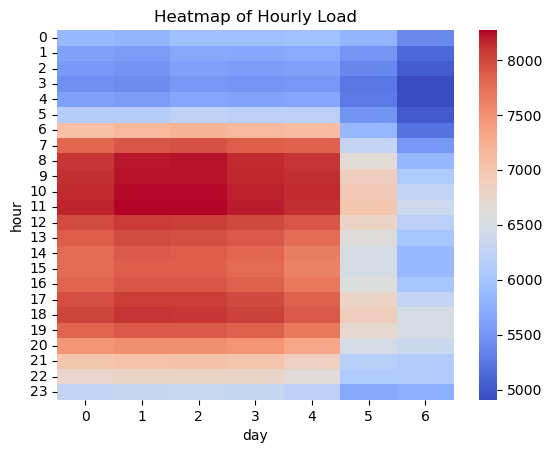

In [67]:
# Heatmap of Hourly Load:
load['hour'] = load['date'].dt.hour
load['day'] = load['date'].dt.dayofweek
load['month'] = load['date'].dt.month
load['year'] = load['date'].dt.year

load_pivot = load.pivot_table(index='hour', columns='day', values='load_AT', aggfunc='mean')
sns.heatmap(load_pivot, cmap='coolwarm')
plt.title('Heatmap of Hourly Load_AT')
plt.show()

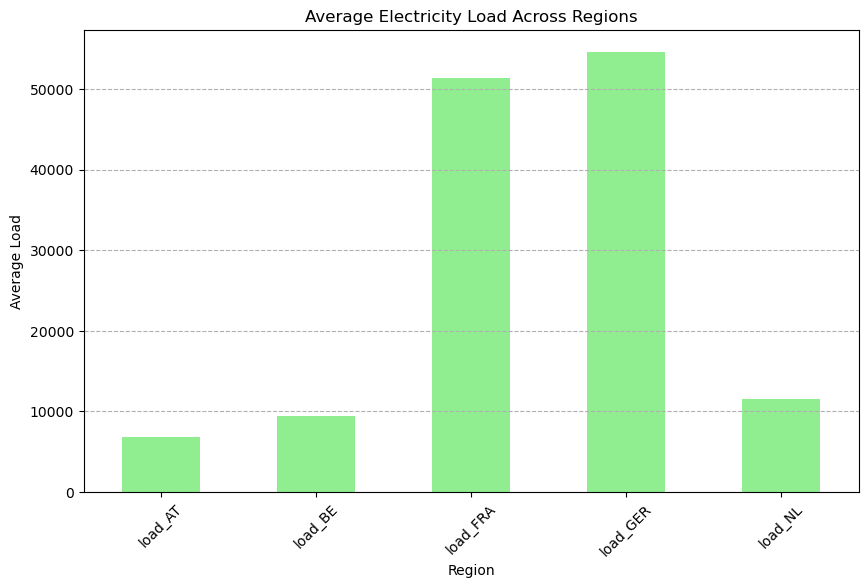

In [3]:
average_load = load[['load_AT', 'load_BE', 'load_FRA', 'load_GER', 'load_NL']].mean()
average_load_plot = average_load.plot(kind='bar', figsize=(10, 6), color='lightgreen')

plt.title('Average Electricity Load Across Regions')
plt.xlabel('Region')
plt.ylabel('Average Load')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--')

plt.show()

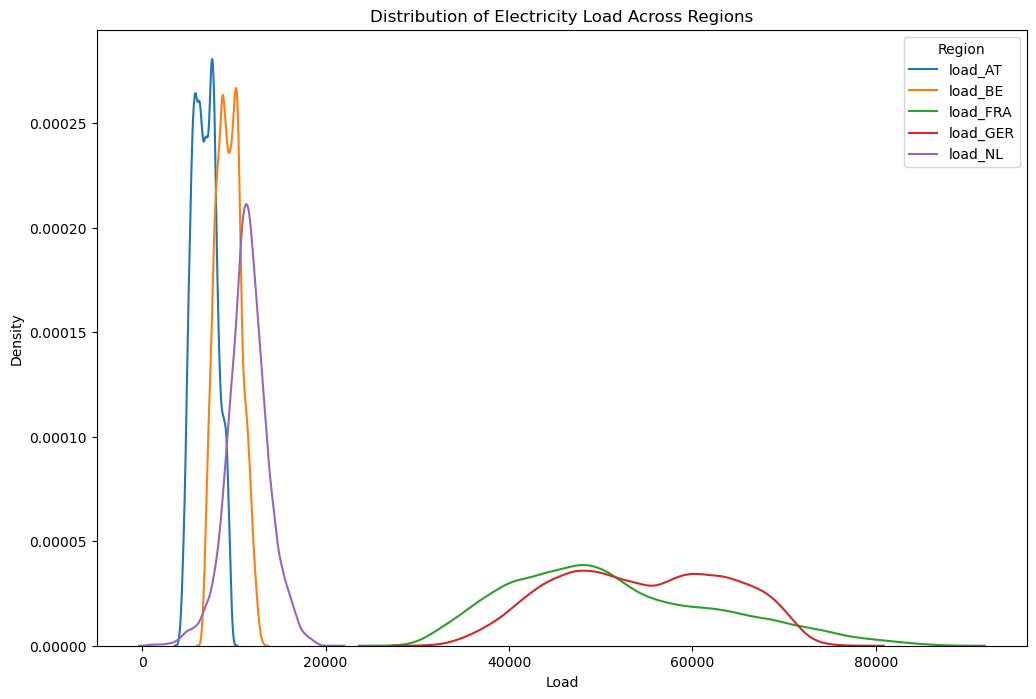

In [4]:
plt.figure(figsize=(12, 8))

for column in ['load_AT', 'load_BE', 'load_FRA', 'load_GER', 'load_NL']:
    sns.kdeplot(load[column], label=column)

plt.title('Distribution of Electricity Load Across Regions')
plt.xlabel('Load')
plt.ylabel('Density')
plt.legend(title='Region')

plt.show()

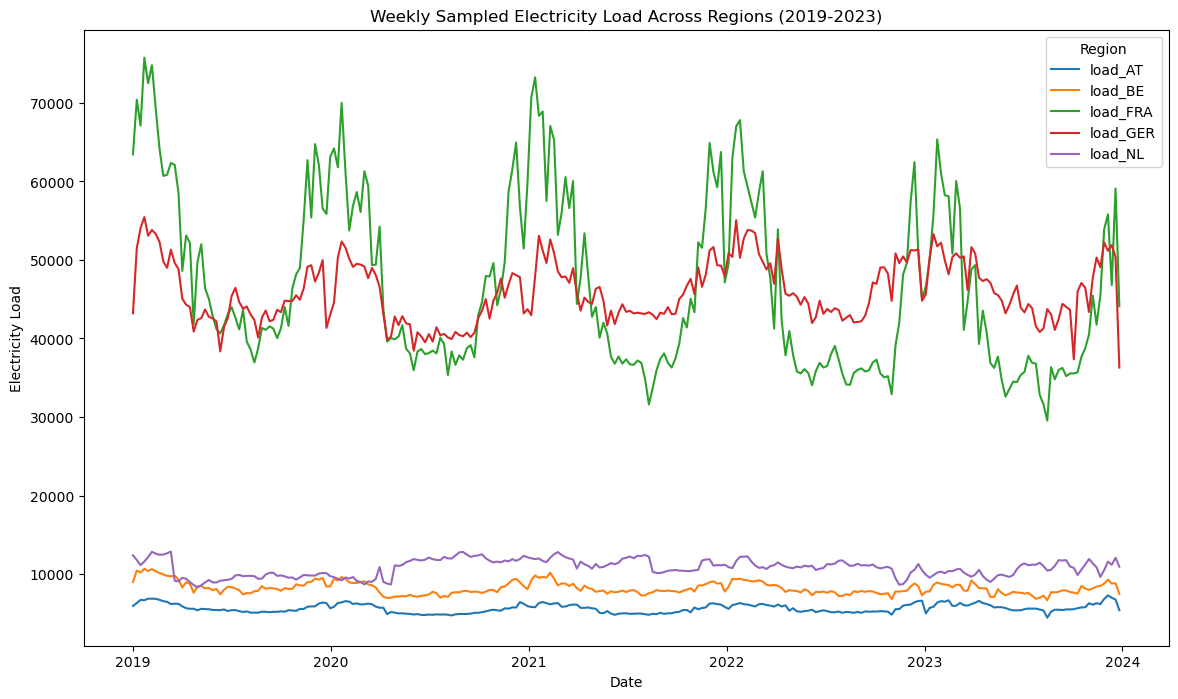

In [5]:

plt.figure(figsize=(14, 8))

for column in ['load_AT', 'load_BE', 'load_FRA', 'load_GER', 'load_NL']:
    # We'll plot a sample of the data to keep the plot legible and focused
    sampled_data = load.loc[::24*7, ['date', column]]  # Weekly sampling for clarity
    sns.lineplot(x='date', y=column, data=sampled_data, label=column)

plt.title('Weekly Sampled Electricity Load Across Regions (2019-2023)')
plt.xlabel('Date')
plt.ylabel('Electricity Load')
plt.legend(title='Region')

plt.show()

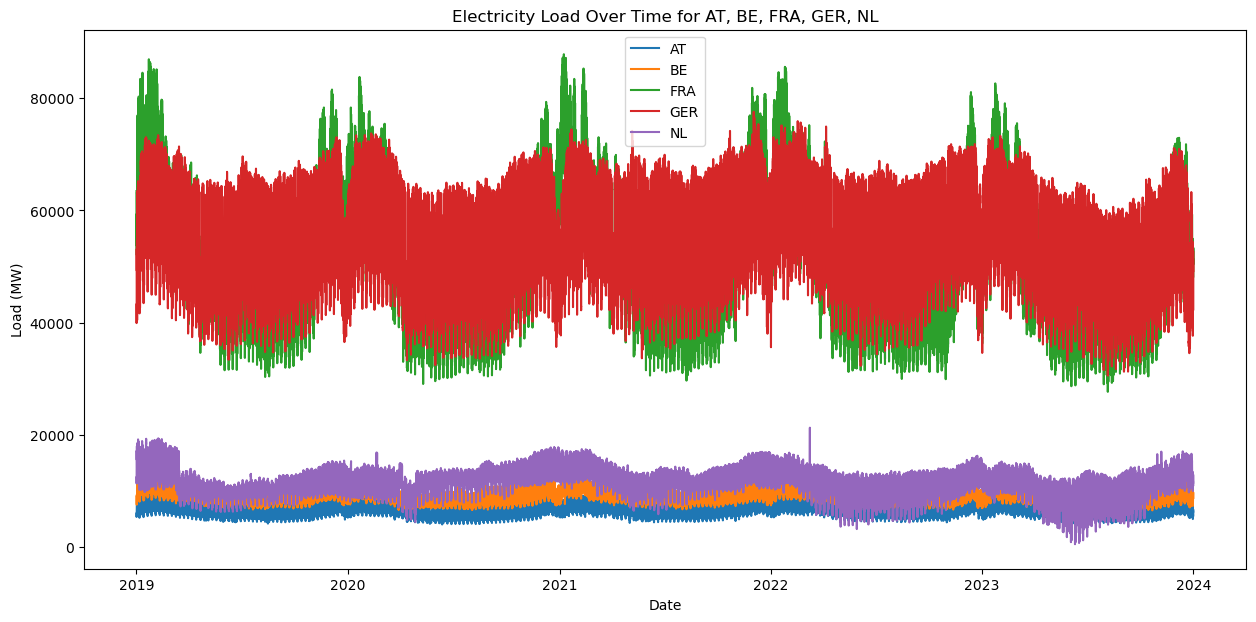

In [6]:
plt.figure(figsize=(15, 7))
for country_code in ['AT', 'BE', 'FRA', 'GER', 'NL']:
    plt.plot(load['date'], load[f'load_{country_code}'], label=f'{country_code}')

plt.title('Electricity Load Over Time for AT, BE, FRA, GER, NL')
plt.xlabel('Date')
plt.ylabel('Load (MW)')
plt.legend()
plt.show()

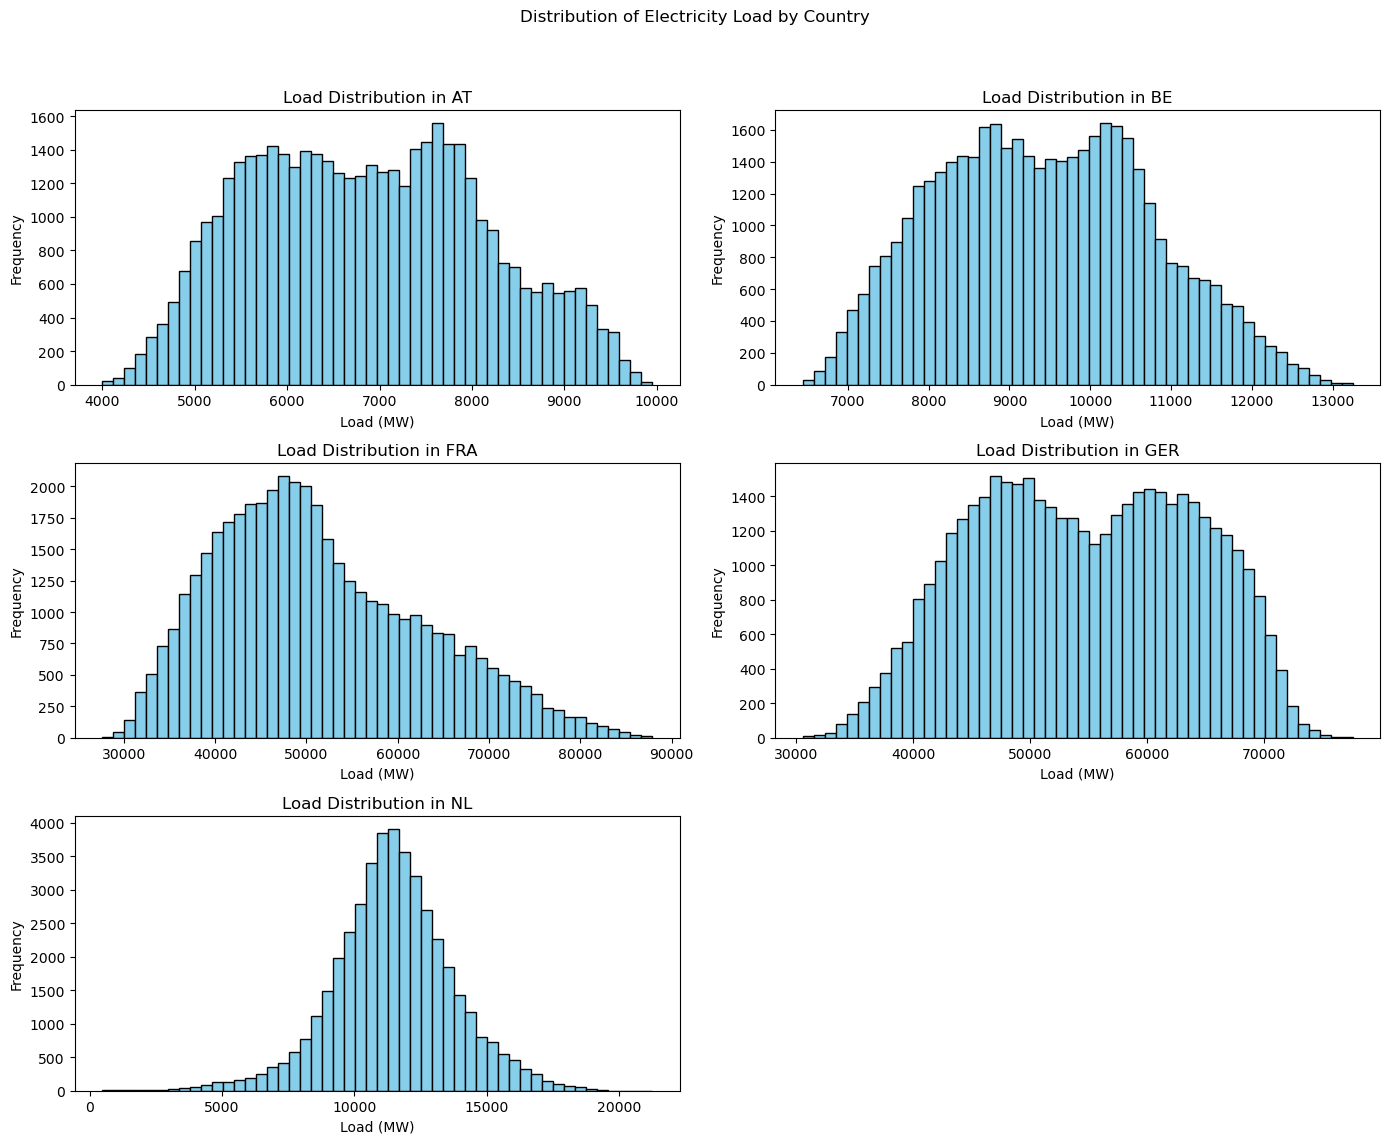

In [7]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14, 12))
fig.suptitle('Distribution of Electricity Load by Country')

axes = axes.flatten()

for i, country_code in enumerate(['AT', 'BE', 'FRA', 'GER', 'NL']):
    axes[i].hist(load[f'load_{country_code}'], bins=50, color='skyblue', edgecolor='black')
    axes[i].set_title(f'Load Distribution in {country_code}')
    axes[i].set_xlabel('Load (MW)')
    axes[i].set_ylabel('Frequency')

axes[-1].axis('off')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

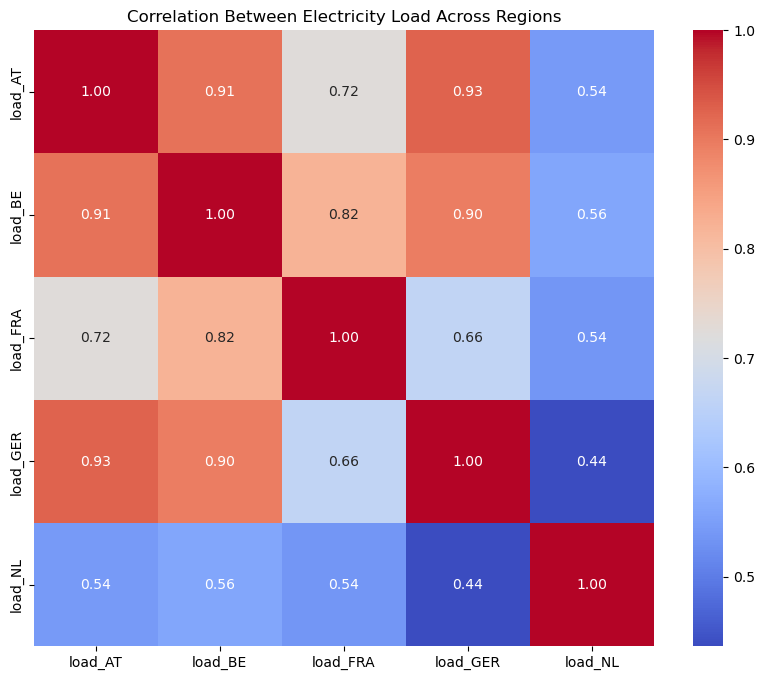

In [12]:

load_corr = load[['load_AT', 'load_BE', 'load_FRA', 'load_GER', 'load_NL']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(load_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Between Electricity Load Across Regions')
plt.show()

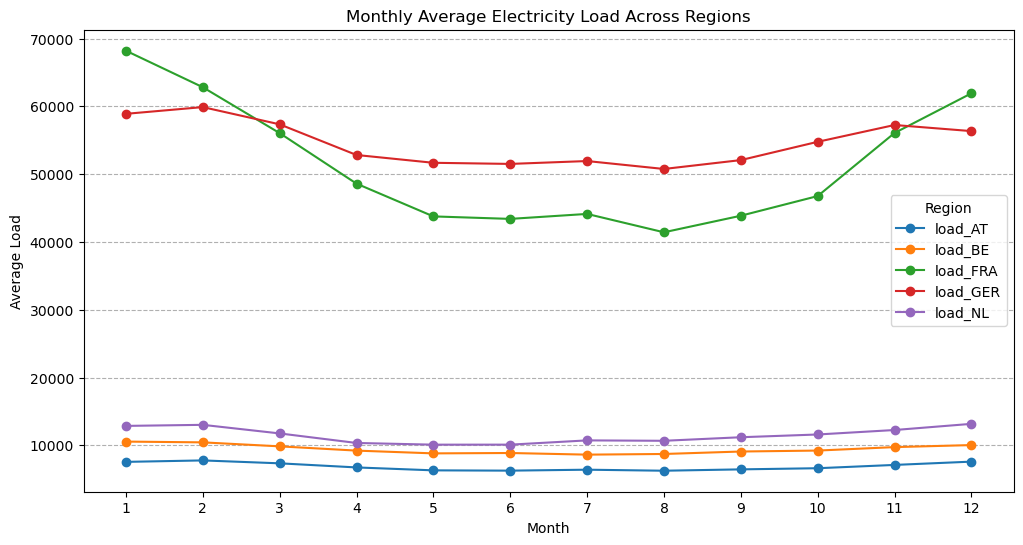

In [15]:
# Plotting the monthly average load for each region to identify seasonal patterns
load['month'] = load['date'].dt.month
monthly_avg_load = load.groupby('month')[['load_AT', 'load_BE', 'load_FRA', 'load_GER', 'load_NL']].mean()

plt.figure(figsize=(12, 6))
for column in monthly_avg_load.columns:
    plt.plot(monthly_avg_load.index, monthly_avg_load[column], marker='o', label=column)

plt.title('Monthly Average Electricity Load Across Regions')
plt.xlabel('Month')
plt.ylabel('Average Load')
plt.xticks(monthly_avg_load.index)
plt.legend(title='Region')
plt.grid(axis='y', linestyle='--')


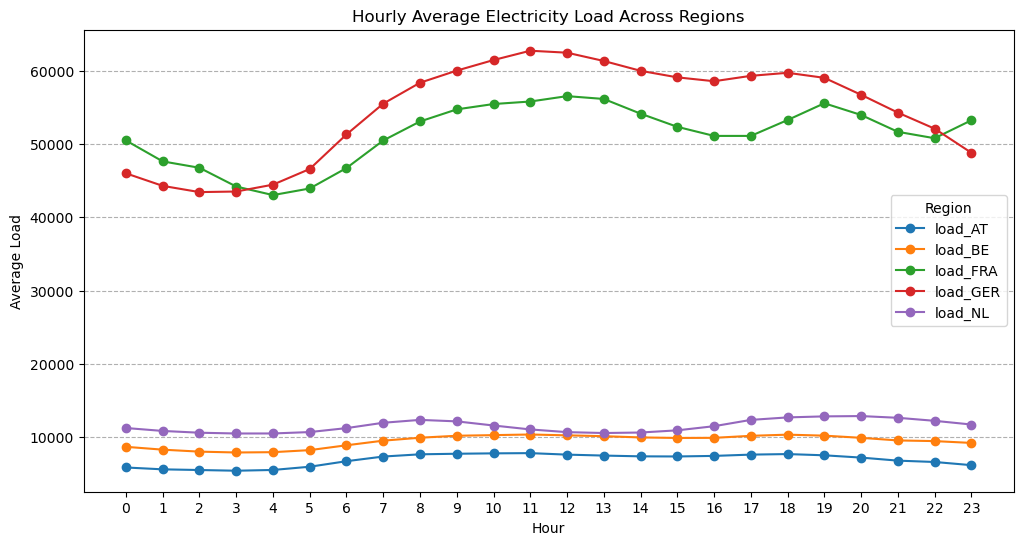

In [16]:
# Daily Load Patterns - Average load for each hour of the day
load['hour'] = load['date'].dt.hour
hourly_avg_load = load.groupby('hour')[['load_AT', 'load_BE', 'load_FRA', 'load_GER', 'load_NL']].mean()

plt.figure(figsize=(12, 6))
for column in hourly_avg_load.columns:
    plt.plot(hourly_avg_load.index, hourly_avg_load[column], marker='o', label=column)

plt.title('Hourly Average Electricity Load Across Regions')
plt.xlabel('Hour')
plt.ylabel('Average Load')
plt.xticks(hourly_avg_load.index)
plt.legend(title='Region')
plt.grid(axis='y', linestyle='--')

plt.show()


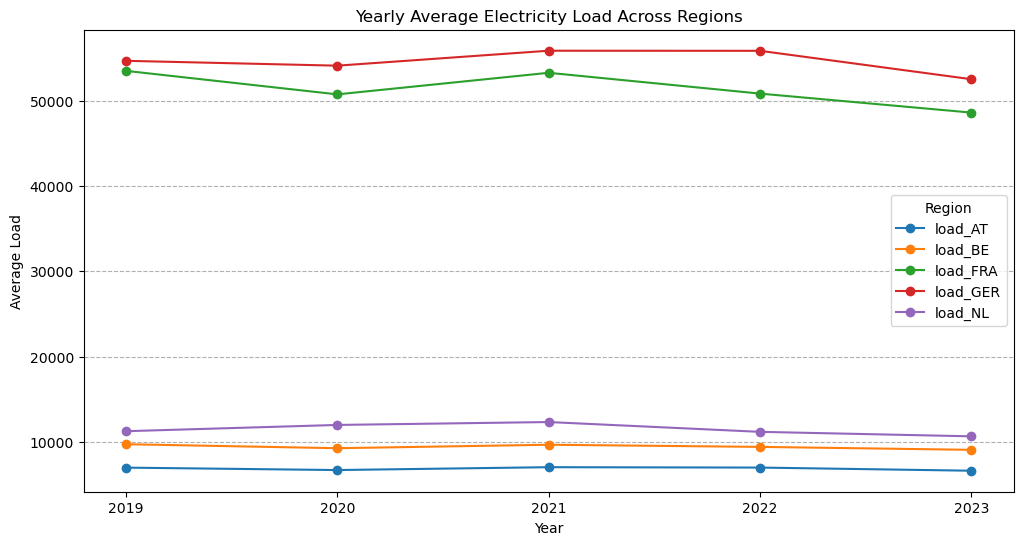

In [17]:
# Yearly Load Trend - Average load for each year
load['year'] = load['date'].dt.year
yearly_avg_load = load.groupby('year')[['load_AT', 'load_BE', 'load_FRA', 'load_GER', 'load_NL']].mean()

plt.figure(figsize=(12, 6))
for column in yearly_avg_load.columns:
    plt.plot(yearly_avg_load.index, yearly_avg_load[column], marker='o', label=column)

plt.title('Yearly Average Electricity Load Across Regions')
plt.xlabel('Year')
plt.ylabel('Average Load')
plt.xticks(yearly_avg_load.index)
plt.legend(title='Region')
plt.grid(axis='y', linestyle='--')

plt.show()


## PRICES

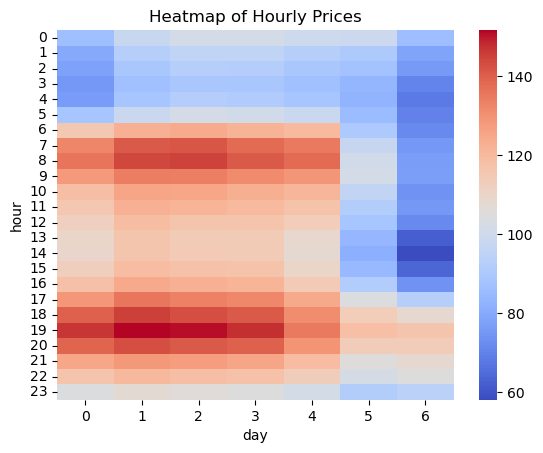

In [66]:
# Heatmap of Hourly Prices:
prices['hour'] = prices['date'].dt.hour
prices['day'] = prices['date'].dt.dayofweek
prices['month'] = prices['date'].dt.month
prices['year'] = prices['date'].dt.year

prices_pivot = prices.pivot_table(index='hour', columns='day', values='price_AT', aggfunc='mean')
sns.heatmap(prices_pivot, cmap='coolwarm')
plt.title('Heatmap of Hourly Prices')
plt.show()

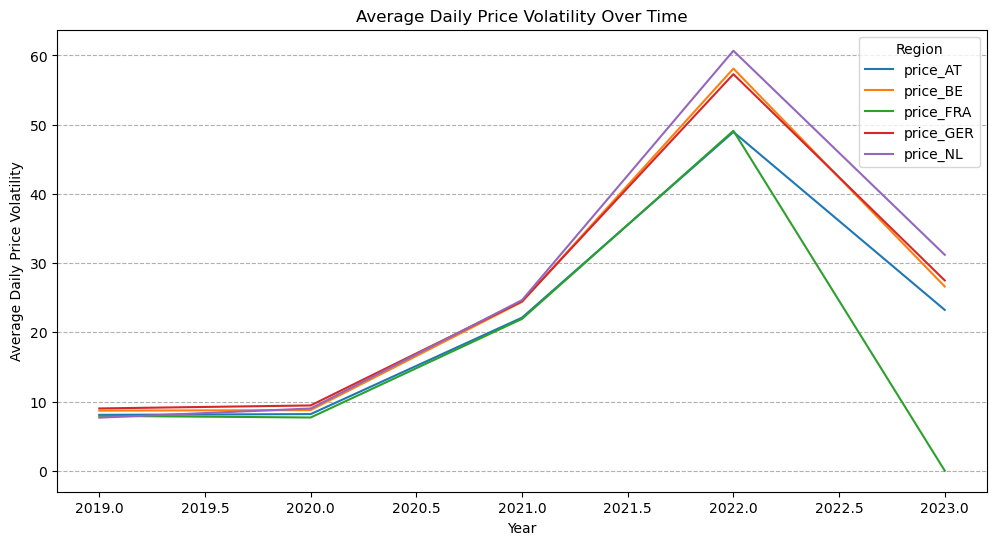

In [73]:
# Price Volatility Over Time
prices['day'] = prices['date'].dt.day
daily_std_prices = prices.groupby(['year', 'month', 'day'])[['price_AT', 'price_BE', 'price_FRA', 'price_GER', 'price_NL']].std()

plt.figure(figsize=(12, 6))
daily_std_prices.groupby('year').mean().plot(kind='line', ax=plt.gca())
plt.title('Average Daily Price Volatility Over Time')
plt.xlabel('Year')
plt.ylabel('Average Daily Price Volatility')
plt.legend(title='Region')
plt.grid(axis='y', linestyle='--')

plt.show()


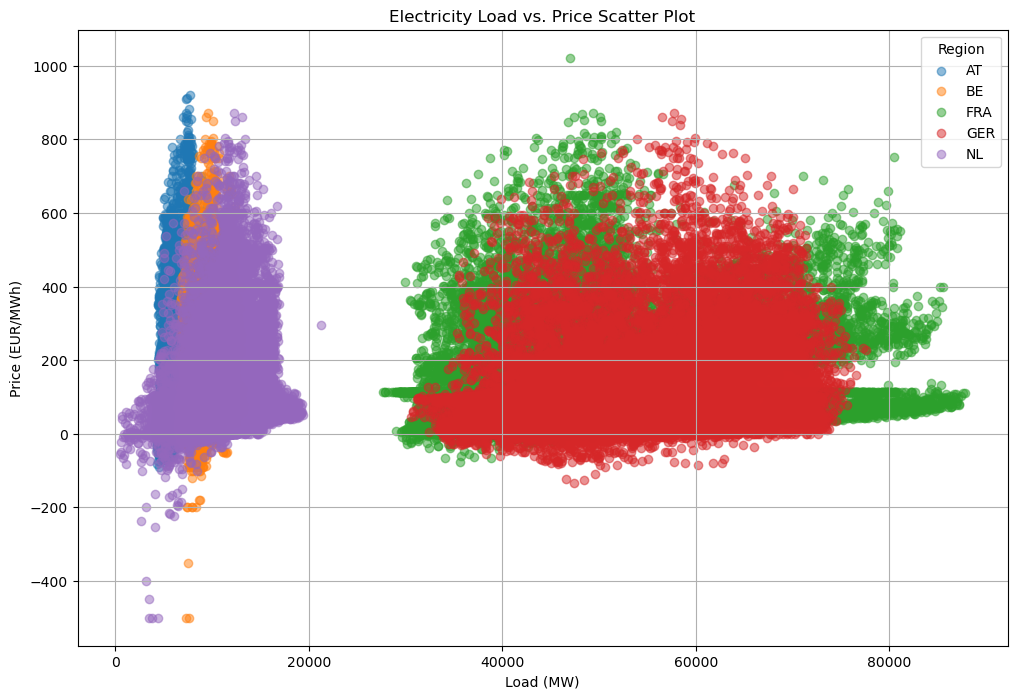

In [74]:
# Price vs. Load Scatter Plot
load_prices = pd.merge(load, prices, on='date', suffixes=('_load', '_price'))

plt.figure(figsize=(12, 8))
for region in ['AT', 'BE', 'FRA', 'GER', 'NL']:
    plt.scatter(load_prices[f'load_{region}'], load_prices[f'price_{region}'], alpha=0.5, label=region)

plt.title('Electricity Load vs. Price Scatter Plot')
plt.xlabel('Load (MW)')
plt.ylabel('Price (EUR/MWh)')
plt.legend(title='Region')
plt.grid(True)

plt.show()


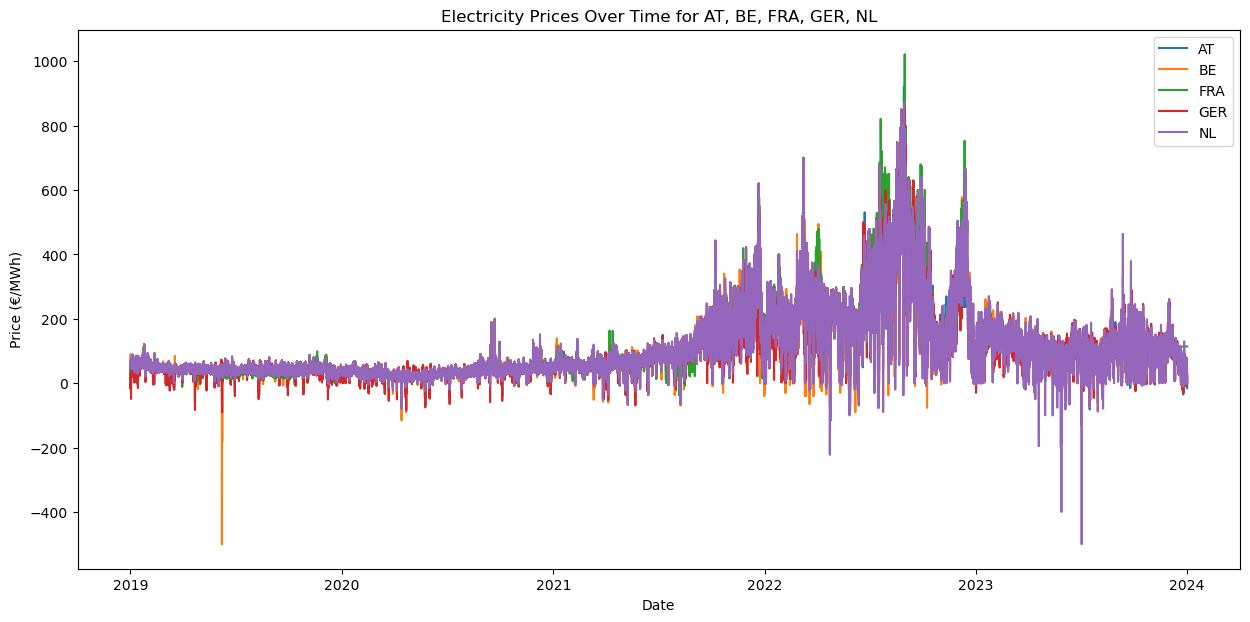

In [8]:
plt.figure(figsize=(15, 7))

for country_code in ['AT', 'BE', 'FRA', 'GER', 'NL']:
    plt.plot(prices['date'], prices[f'price_{country_code}'], label=f'{country_code}')

plt.title('Electricity Prices Over Time for AT, BE, FRA, GER, NL')
plt.xlabel('Date')
plt.ylabel('Price (€/MWh)')
plt.legend()
plt.show()


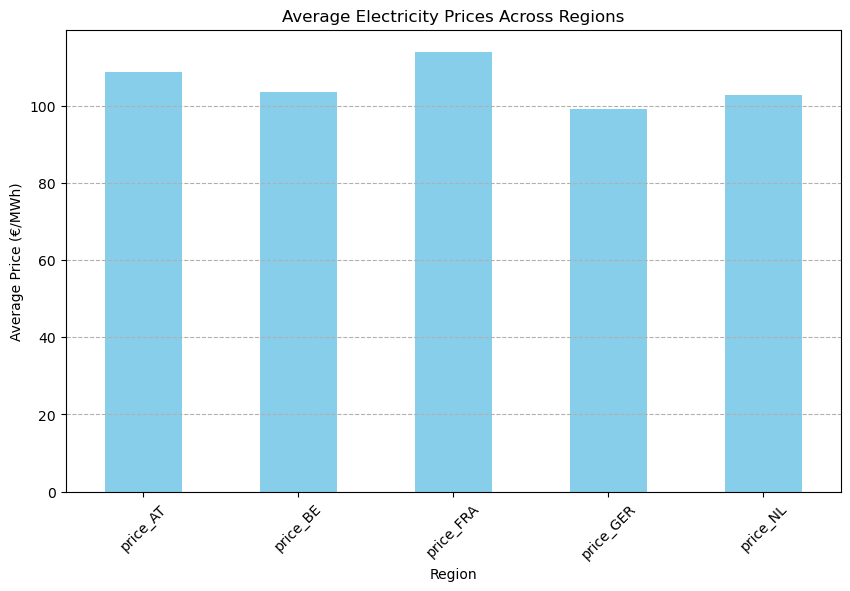

In [9]:
average_prices = prices[['price_AT', 'price_BE', 'price_FRA', 'price_GER', 'price_NL']].mean()
average_prices_plot = average_prices.plot(kind='bar', figsize=(10, 6), color='skyblue')

plt.title('Average Electricity Prices Across Regions')
plt.xlabel('Region')
plt.ylabel('Average Price (€/MWh)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--')

plt.show()

C:\Users\volco\AppData\Local\Temp\ipykernel_8412\420088280.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(prices[column], hist=False, label=column)
C:\Users\volco\AppData\Local\Temp\ipykernel_8412\420088280.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(prices[column]

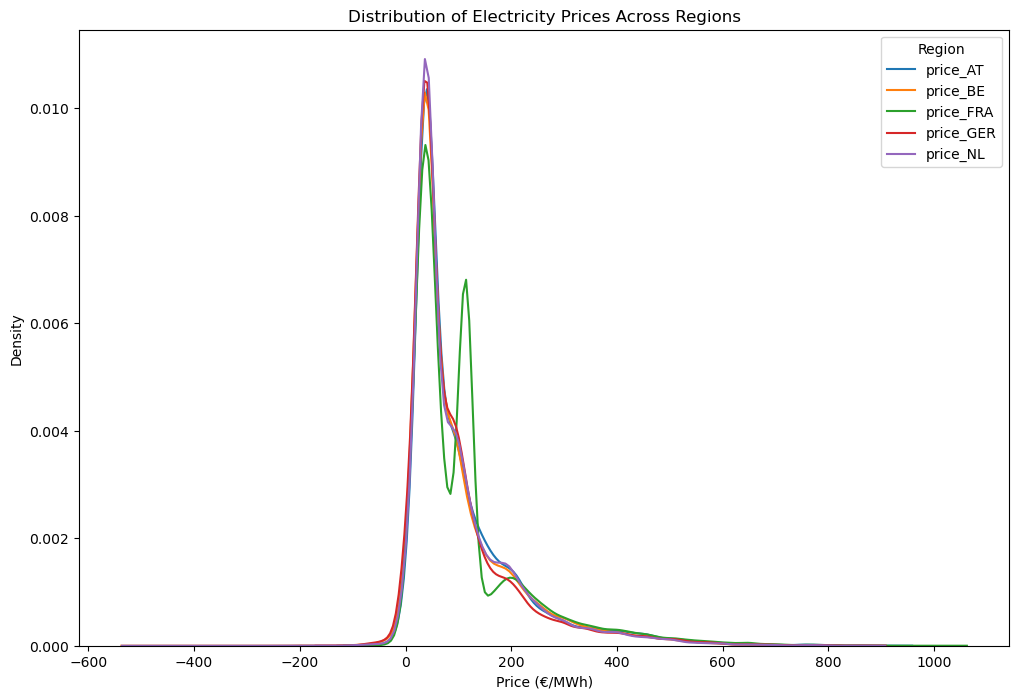

In [10]:
plt.figure(figsize=(12, 8))

for column in ['price_AT', 'price_BE', 'price_FRA', 'price_GER', 'price_NL']:
    sns.distplot(prices[column], hist=False, label=column)

plt.title('Distribution of Electricity Prices Across Regions')
plt.xlabel('Price (€/MWh)')
plt.ylabel('Density')
plt.legend(title='Region')

plt.show()

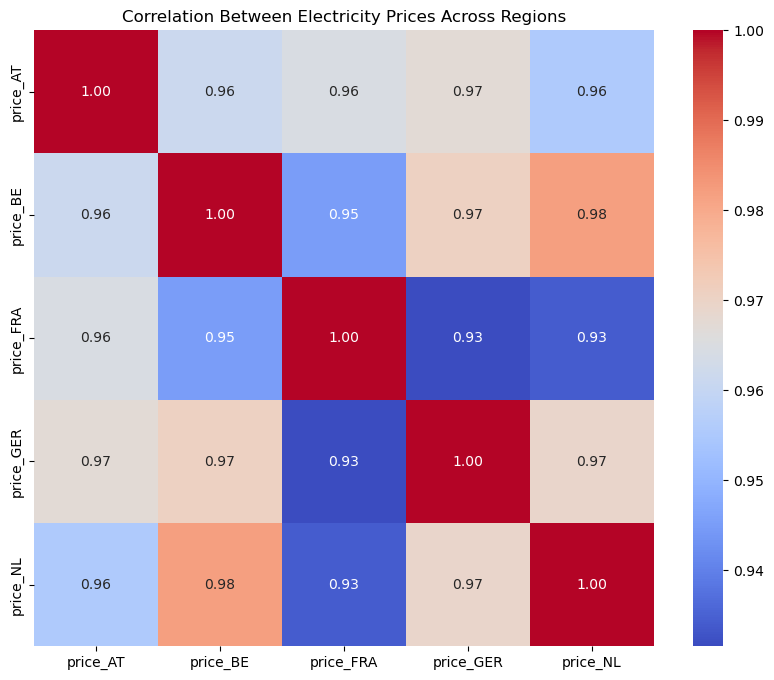

In [19]:


prices_corr = prices[['price_AT', 'price_BE', 'price_FRA', 'price_GER', 'price_NL']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(prices_corr, annot=True, cmap='coolwarm', fmt=".2f")

plt.title('Correlation Between Electricity Prices Across Regions')
plt.show()


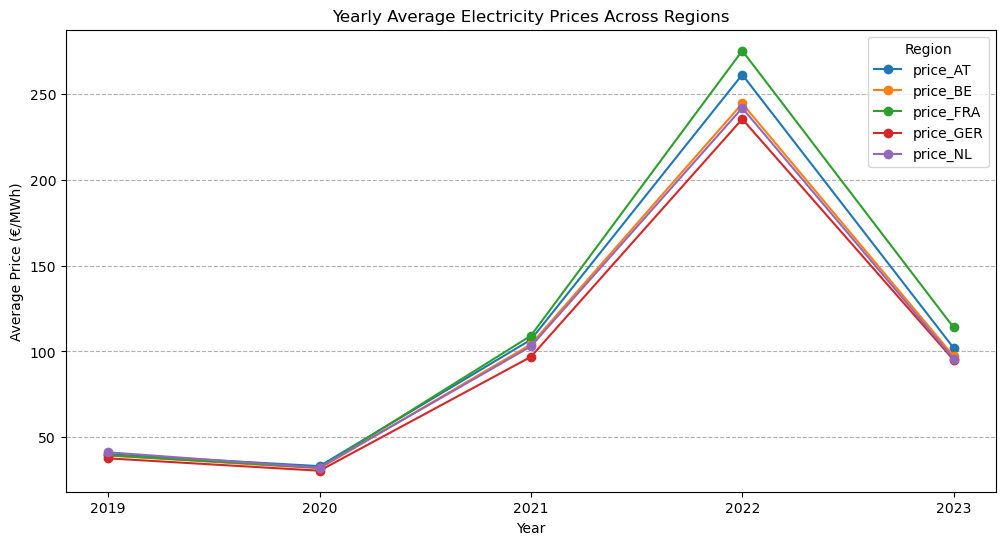

In [20]:
# a Yearly Average Price plot for each country to see the trends over the years.

prices['year'] = prices['date'].dt.year

yearly_avg_prices = prices.groupby('year')[['price_AT', 'price_BE', 'price_FRA', 'price_GER', 'price_NL']].mean()

plt.figure(figsize=(12, 6))
for column in yearly_avg_prices.columns:
    plt.plot(yearly_avg_prices.index, yearly_avg_prices[column], marker='o', label=column)

plt.title('Yearly Average Electricity Prices Across Regions')
plt.xlabel('Year')
plt.ylabel('Average Price (€/MWh)')
plt.xticks(yearly_avg_prices.index)
plt.legend(title='Region')
plt.grid(axis='y', linestyle='--')

plt.show()



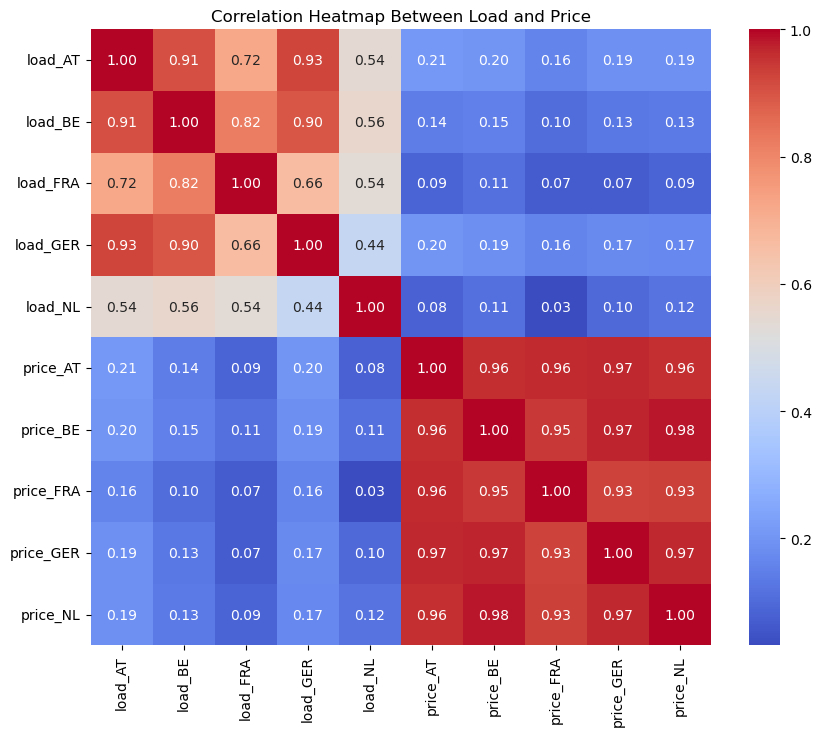

In [11]:
combined_data = load.merge(prices, on='date', how='inner')
correlation_matrix = combined_data.iloc[:, 1:].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap Between Load and Price')
plt.show()

## RES_GEN

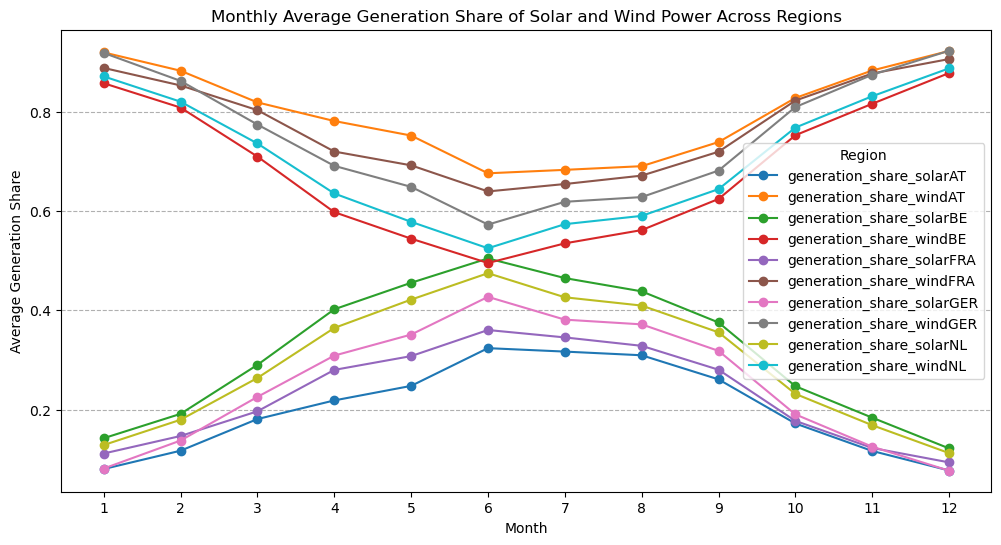

In [77]:
# Renewable vs. Total Generation: For each region
res_gen['year'] = res_gen['date'].dt.year
res_gen['month'] = res_gen['date'].dt.month
# you should calculate the generation share of solar and wind power in each region
res_gen['generation_totalAT'] = res_gen['solar_forecastAT'] + res_gen['windonshore_forecastAT'] 
res_gen['generation_totalBE'] = res_gen['solar_forecastBE'] + res_gen['windonshore_forecastBE']
res_gen['generation_totalFRA'] = res_gen['solar_forecastFRA'] + res_gen['windonshore_forecastFRA']
res_gen['generation_totalGER'] = res_gen['solar_forecastGER'] + res_gen['windonshore_forecastGER']
res_gen['generation_totalNL'] = res_gen['solar_forecastNL'] + res_gen['windonshore_forecastNL']

res_gen['generation_share_solarAT'] = res_gen['solar_forecastAT'] / res_gen['generation_totalAT']
res_gen['generation_share_solarBE'] = res_gen['solar_forecastBE'] / res_gen['generation_totalBE']
res_gen['generation_share_solarFRA'] = res_gen['solar_forecastFRA'] / res_gen['generation_totalFRA']
res_gen['generation_share_solarGER'] = res_gen['solar_forecastGER'] / res_gen['generation_totalGER']
res_gen['generation_share_solarNL'] = res_gen['solar_forecastNL'] / res_gen['generation_totalNL']

res_gen['generation_share_windAT'] = res_gen['windonshore_forecastAT'] / res_gen['generation_totalAT']
res_gen['generation_share_windBE'] = res_gen['windonshore_forecastBE'] / res_gen['generation_totalBE']
res_gen['generation_share_windFRA'] = res_gen['windonshore_forecastFRA'] / res_gen['generation_totalFRA']
res_gen['generation_share_windGER'] = res_gen['windonshore_forecastGER'] / res_gen['generation_totalGER']
res_gen['generation_share_windNL'] = res_gen['windonshore_forecastNL'] / res_gen['generation_totalNL']

# Plotting the monthly average generation share of solar and wind power for each region
monthly_avg_generation_share = res_gen.groupby('month')[['generation_share_solarAT', 'generation_share_windAT',
                                                         'generation_share_solarBE', 'generation_share_windBE',
                                                         'generation_share_solarFRA', 'generation_share_windFRA',
                                                         'generation_share_solarGER', 'generation_share_windGER',
                                                         'generation_share_solarNL', 'generation_share_windNL']].mean()

plt.figure(figsize=(12, 6))
for column in monthly_avg_generation_share.columns:
    plt.plot(monthly_avg_generation_share.index, monthly_avg_generation_share[column], marker='o', label=column)

plt.title('Monthly Average Generation Share of Solar and Wind Power Across Regions')
plt.xlabel('Month')
plt.ylabel('Average Generation Share')
plt.xticks(monthly_avg_generation_share.index)
plt.legend(title='Region')
plt.grid(axis='y', linestyle='--')

plt.show()





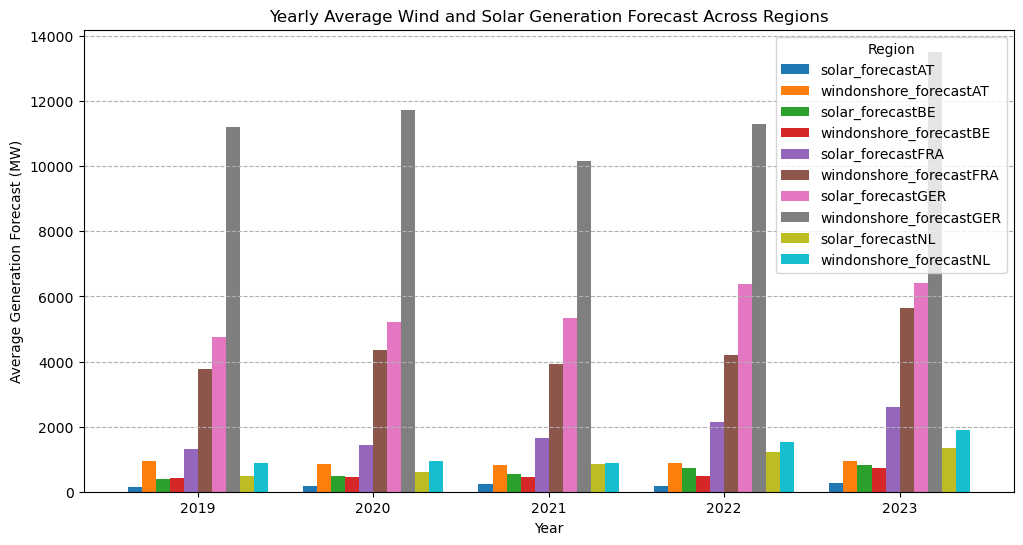

In [78]:
# Wind and Solar Forecast Comparison: Create side-by-side or stacked bar charts comparing the monthly or yearly average forecasts for wind and solar generation in each region. This visualization helps compare the relative contributions of wind and solar to the renewable energy portfolio.
res_gen['year'] = res_gen['date'].dt.year
yearly_avg_generation = res_gen.groupby('year')[['solar_forecastAT', 'windonshore_forecastAT',
                                                'solar_forecastBE', 'windonshore_forecastBE',
                                                'solar_forecastFRA', 'windonshore_forecastFRA',
                                                'solar_forecastGER', 'windonshore_forecastGER',
                                                'solar_forecastNL', 'windonshore_forecastNL']].mean()

yearly_avg_generation.plot(kind='bar', figsize=(12, 6), width=0.8)
plt.title('Yearly Average Wind and Solar Generation Forecast Across Regions')
plt.xlabel('Year')
plt.ylabel('Average Generation Forecast (MW)')
plt.legend(title='Region')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--')

plt.show()


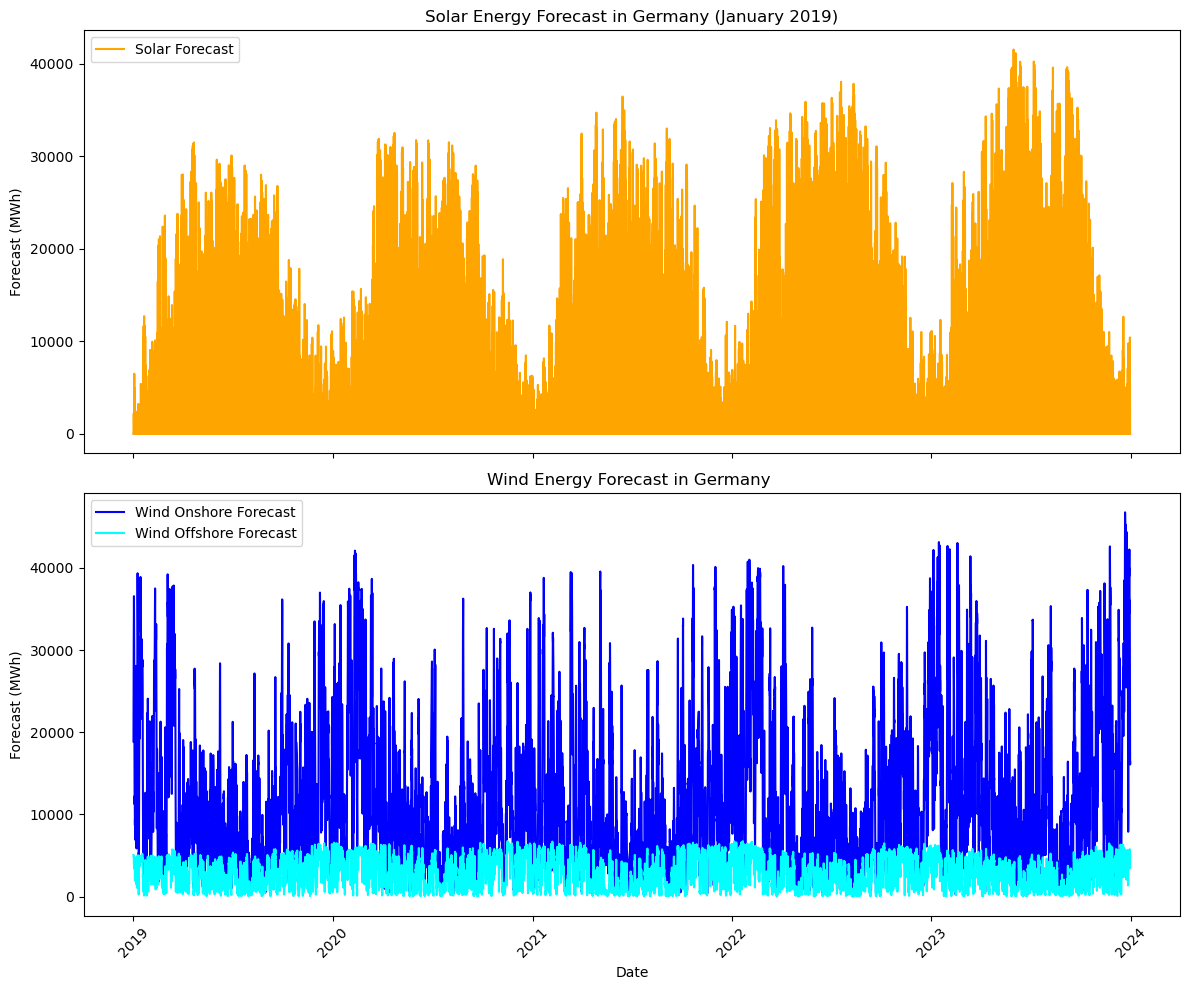

In [13]:
# To manage the large dataset, let's focus on one month of data for visualization
data_subset = res_gen[(res_gen['date'] >= '2019-01-01') & (res_gen['date'] < '2023-12-31')]

# Time series plot for solar and wind energy forecasts in Germany as an example
fig, ax = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

# Solar forecast for Germany
ax[0].plot(data_subset['date'], data_subset['solar_forecastGER'], label='Solar Forecast', color='orange')
ax[0].set_title('Solar Energy Forecast in Germany')
ax[0].set_ylabel('Forecast (MWh)')
ax[0].legend()

# Wind forecast for Germany (combining onshore and offshore)
ax[1].plot(data_subset['date'], data_subset['windonshore_forecastGER'], label='Wind Onshore Forecast', color='blue')
ax[1].plot(data_subset['date'], data_subset['windoffshore_forecastGER'], label='Wind Offshore Forecast', color='cyan')
ax[1].set_title('Wind Energy Forecast in Germany ')
ax[1].set_ylabel('Forecast (MWh)')
ax[1].set_xlabel('Date')
ax[1].legend()

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


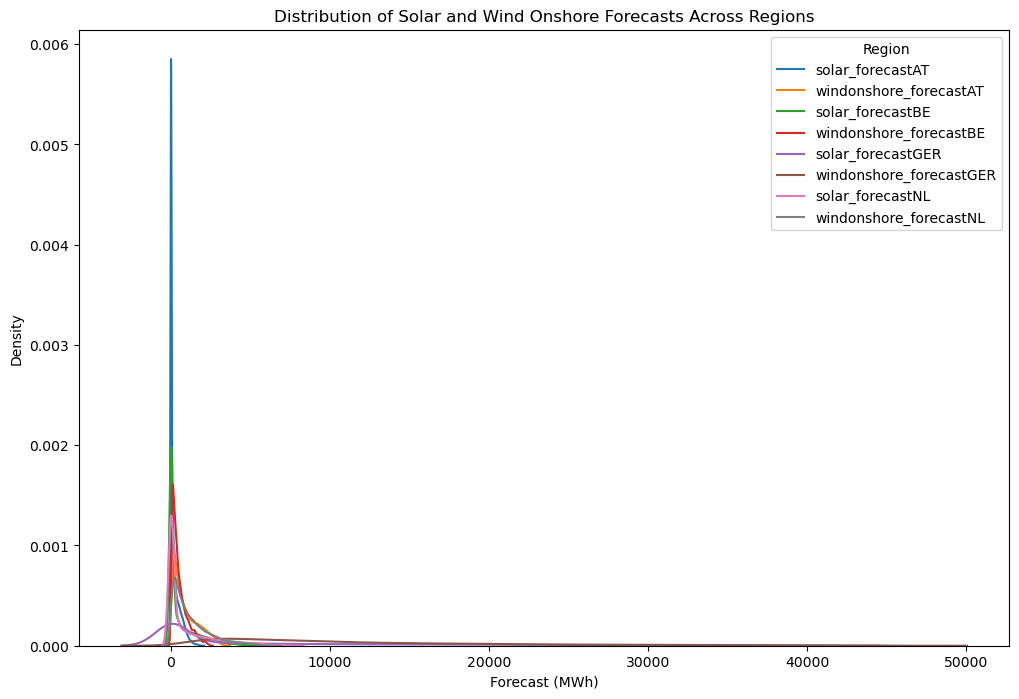

In [25]:
# Distribution plots to understand the variability in renewable generation forecasts across different regions.


plt.figure(figsize=(12, 8))

for column in ['solar_forecastAT', 'windonshore_forecastAT', 'solar_forecastBE', 'windonshore_forecastBE',
                'solar_forecastGER', 'windonshore_forecastGER', 'solar_forecastNL', 'windonshore_forecastNL']:
     sns.kdeplot(data_subset[column], label=column)

plt.title('Distribution of Solar and Wind Onshore Forecasts Across Regions')
plt.xlabel('Forecast (MWh)')
plt.ylabel('Density')
plt.legend(title='Region')

plt.show()


<Figure size 1200x800 with 0 Axes>

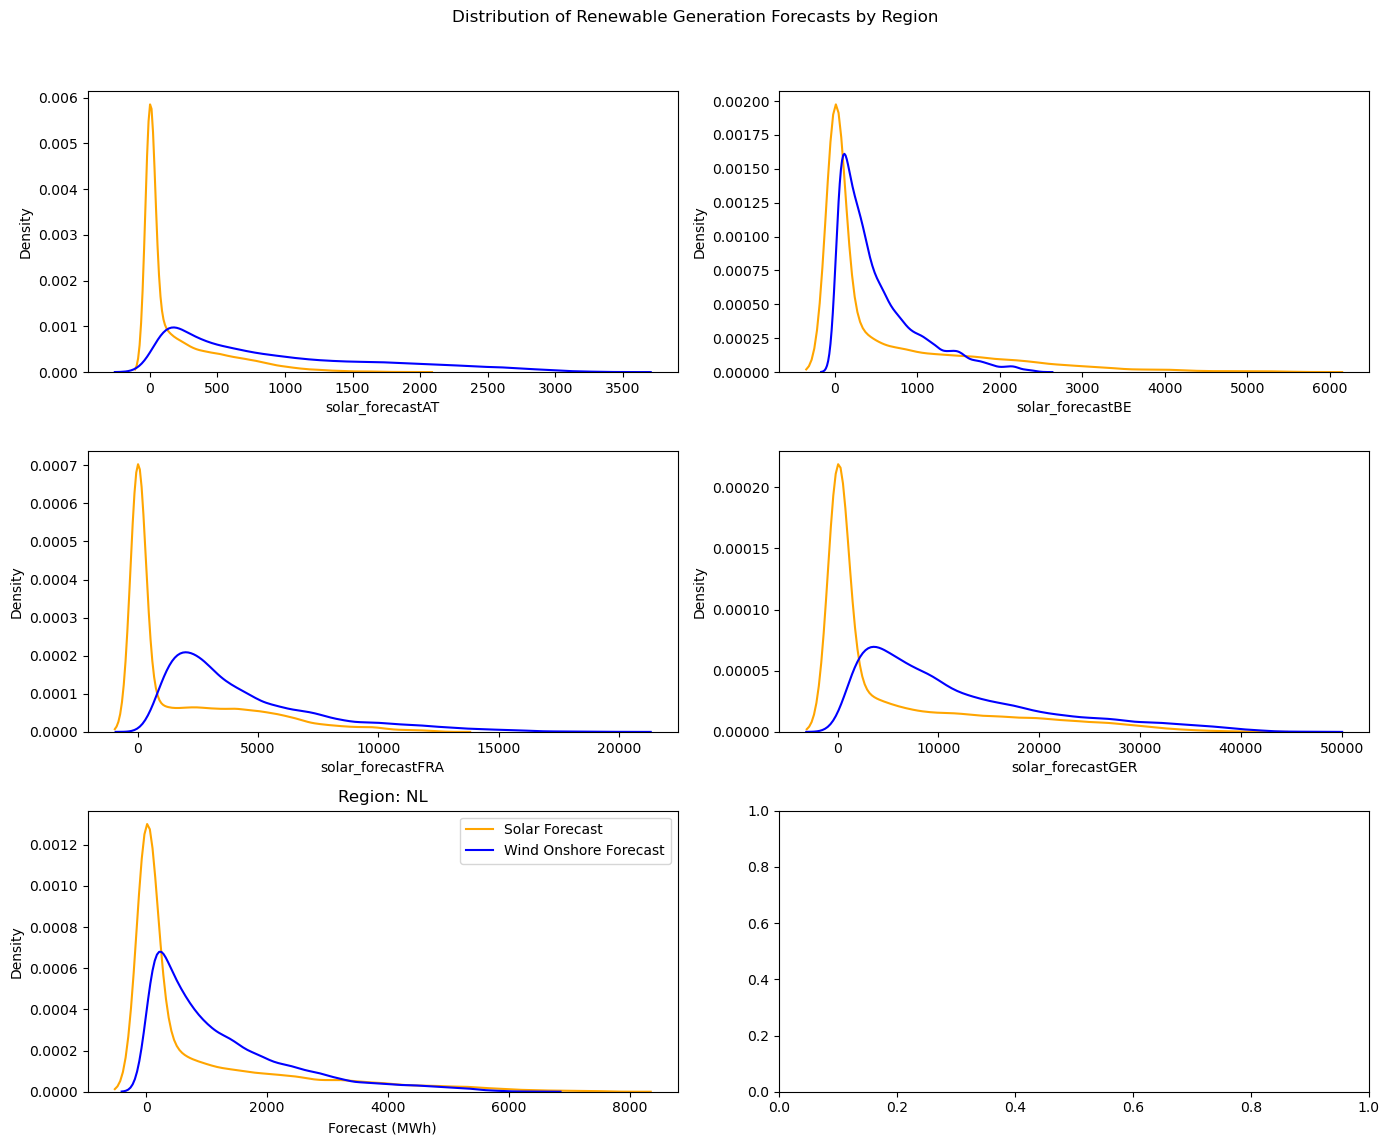

In [44]:
plt.figure(figsize=(12, 8))

fig, axes = plt.subplots(3, 2, figsize=(14, 12))  # Change from 2x2 to 3x2
fig.suptitle('Distribution of Renewable Generation Forecasts by Region')

axes = axes.flatten()

for i, region in enumerate(['AT', 'BE', 'FRA', 'GER', 'NL']):

    sns.kdeplot(data_subset[f'solar_forecast{region}'], ax=axes[i], color='orange', label='Solar Forecast')
    sns.kdeplot(data_subset[f'windonshore_forecast{region}'], ax=axes[i], color='blue', label='Wind Onshore Forecast')

    axes[i].set_title(f'Region: {region}')
    axes[i].set_xlabel('Forecast (MWh)')
    axes[i].set_ylabel('Density')
    axes[i].legend()  # Add this line to each subplot

plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()


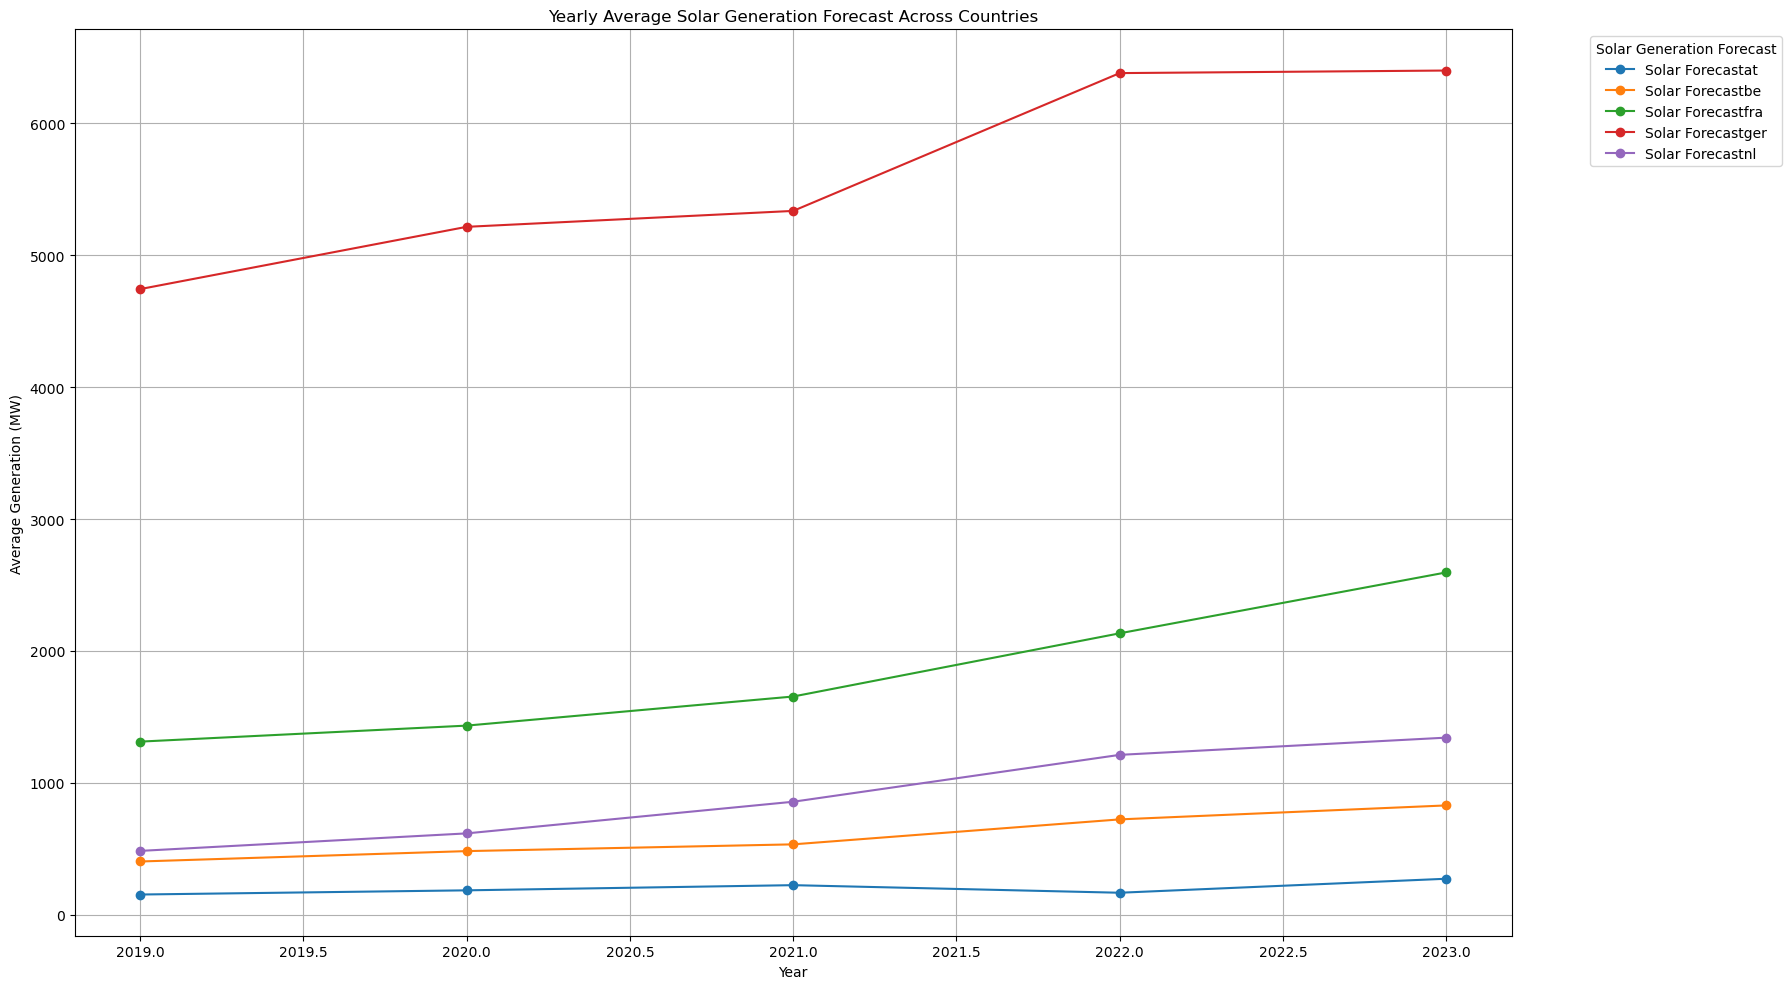

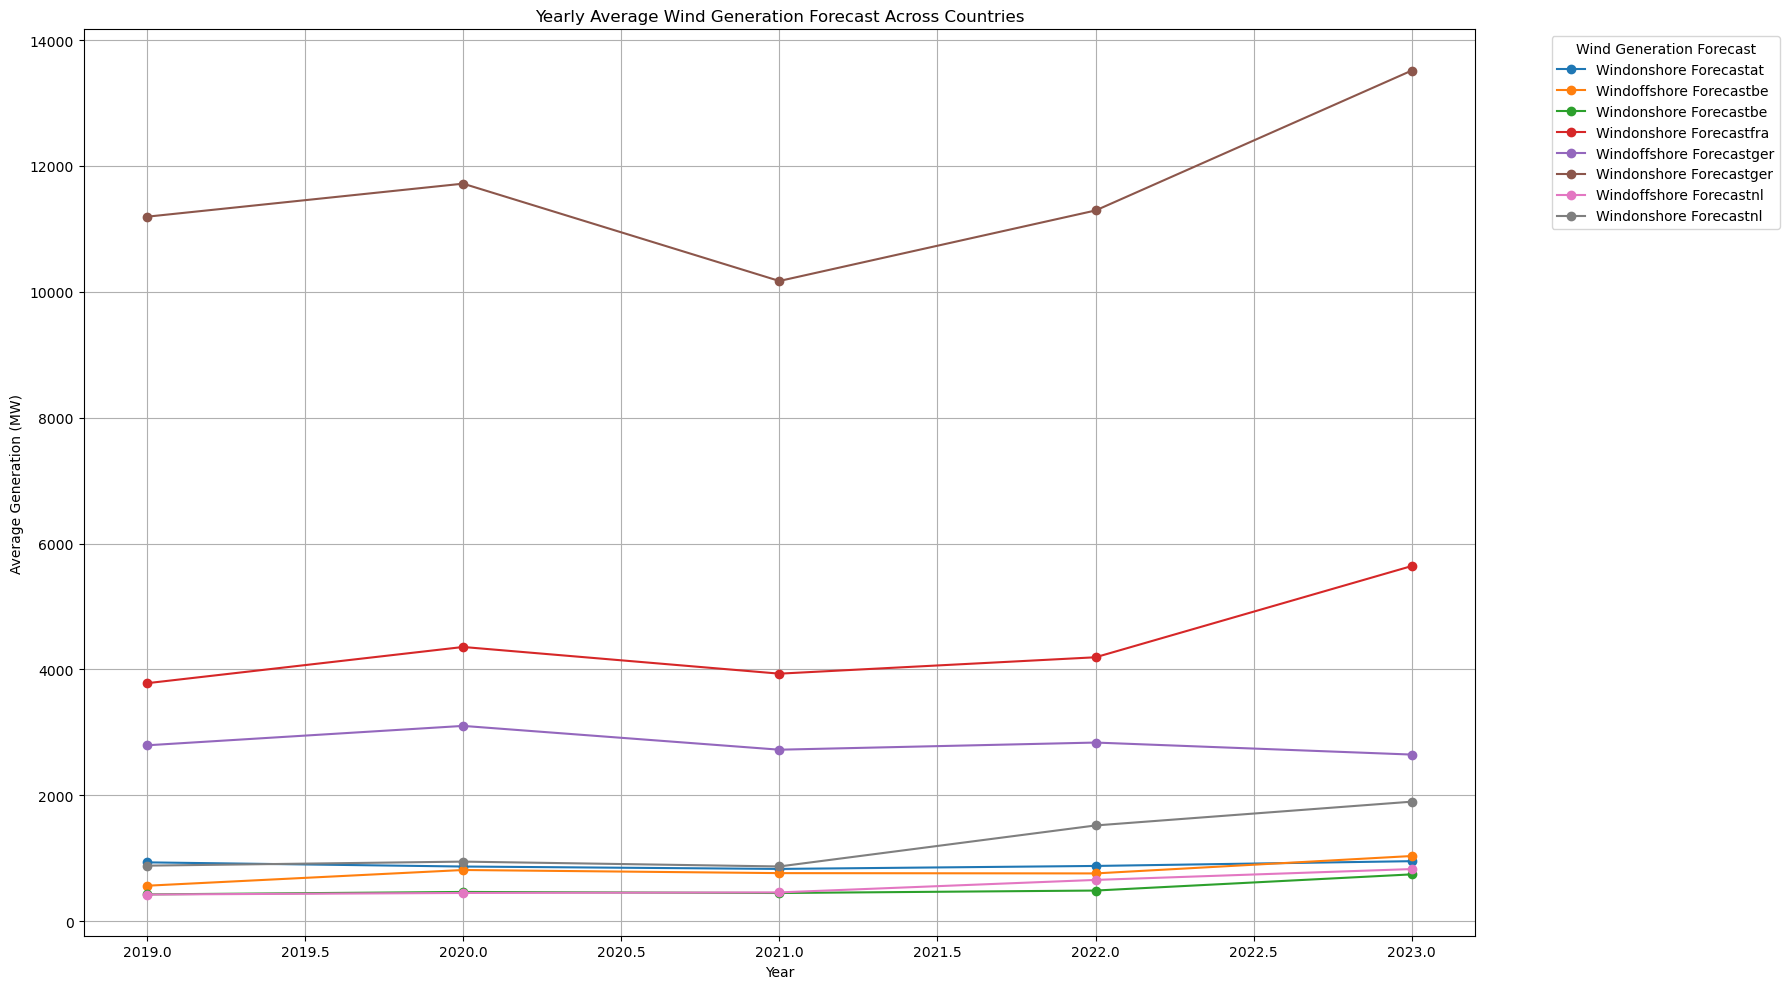

In [42]:
# Extracting the year from the date for grouping
res_gen['year'] = res_gen['date'].dt.year

# Grouping data by year and calculating the average forecast for solar and wind generation
yearly_avg_res_gen = res_gen.groupby('year').mean()

# Dropping any non-numeric columns (like 'year' if it was included as a separate column)
yearly_avg_res_gen = yearly_avg_res_gen.select_dtypes(include=['float64', 'int'])

# Plotting the yearly average forecast for solar generation across countries
plt.figure(figsize=(18, 10))
for column in yearly_avg_res_gen.columns:
    if 'solar' in column:
        plt.plot(yearly_avg_res_gen.index, yearly_avg_res_gen[column], marker='o', label=column.replace('_', ' ').title())

plt.title('Yearly Average Solar Generation Forecast Across Countries')
plt.xlabel('Year')
plt.ylabel('Average Generation (MW)')
plt.legend(title='Solar Generation Forecast', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

# Plotting the yearly average forecast for wind generation across countries
plt.figure(figsize=(18, 10))
for column in yearly_avg_res_gen.columns:
    if 'wind' in column:
        plt.plot(yearly_avg_res_gen.index, yearly_avg_res_gen[column], marker='o', label=column.replace('_', ' ').title())

plt.title('Yearly Average Wind Generation Forecast Across Countries')
plt.xlabel('Year')
plt.ylabel('Average Generation (MW)')
plt.legend(title='Wind Generation Forecast', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()


C:\Users\volco\AppData\Local\Temp\ipykernel_8412\768138833.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  res_gen_selected_year['month'] = res_gen_selected_year['date'].dt.month


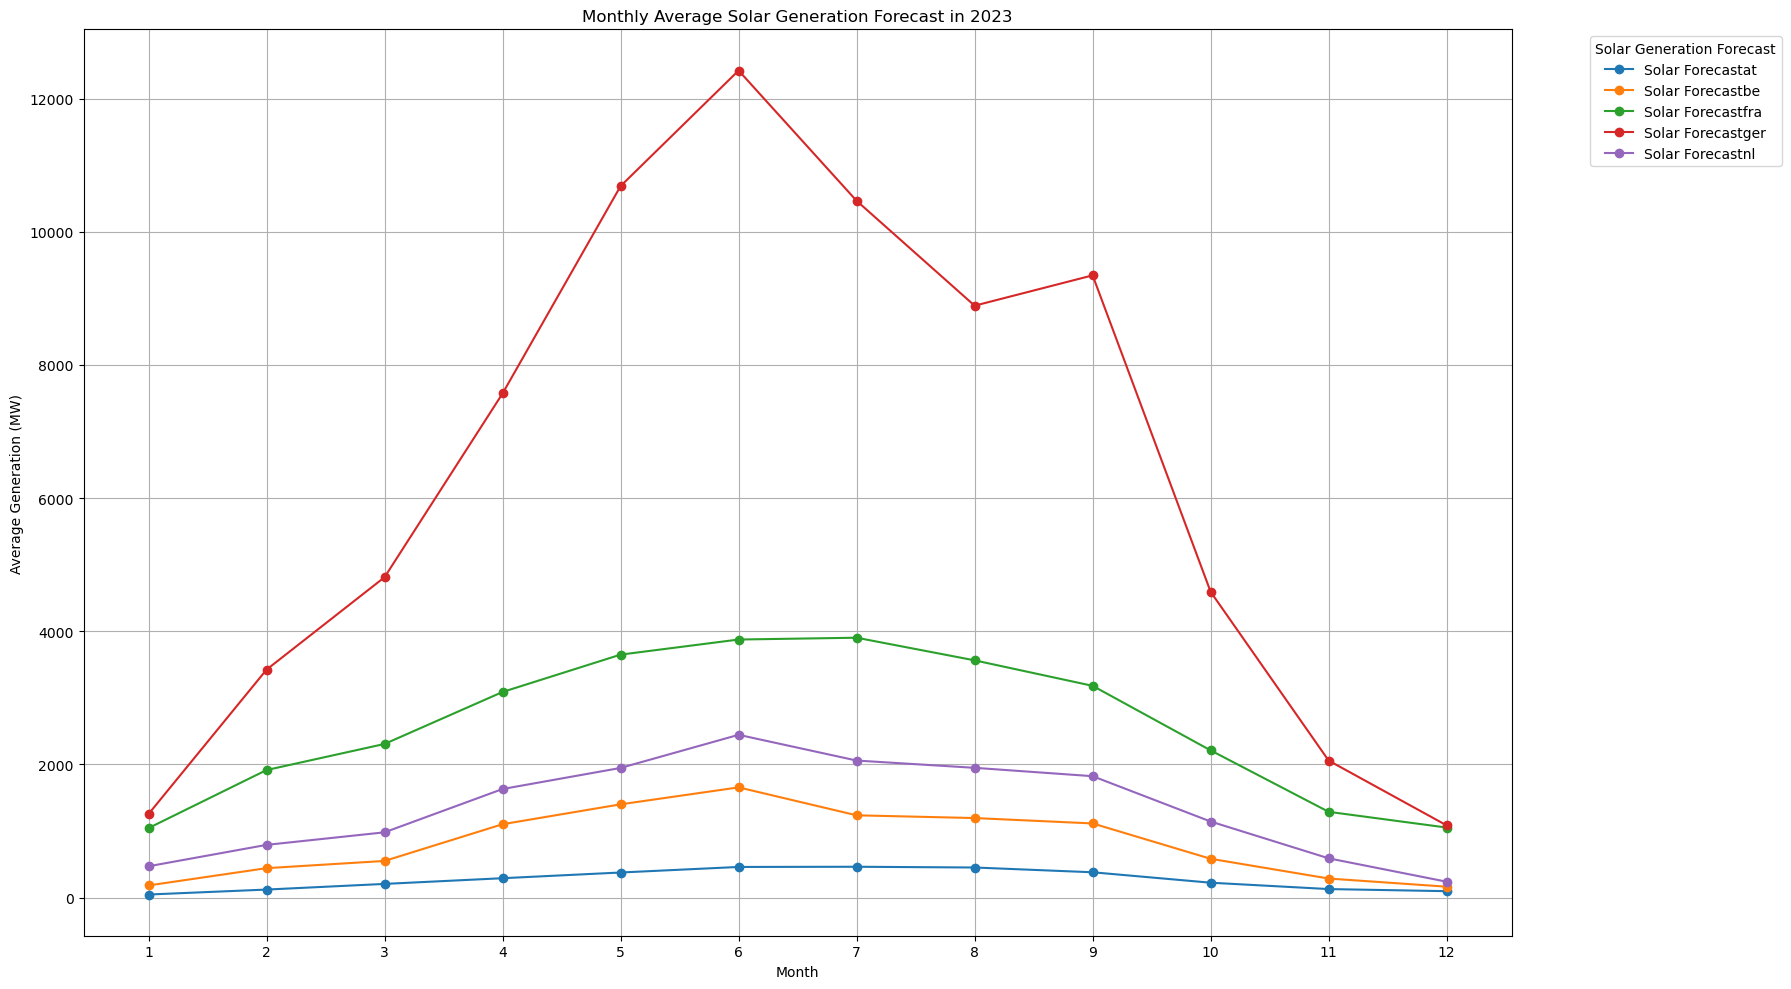

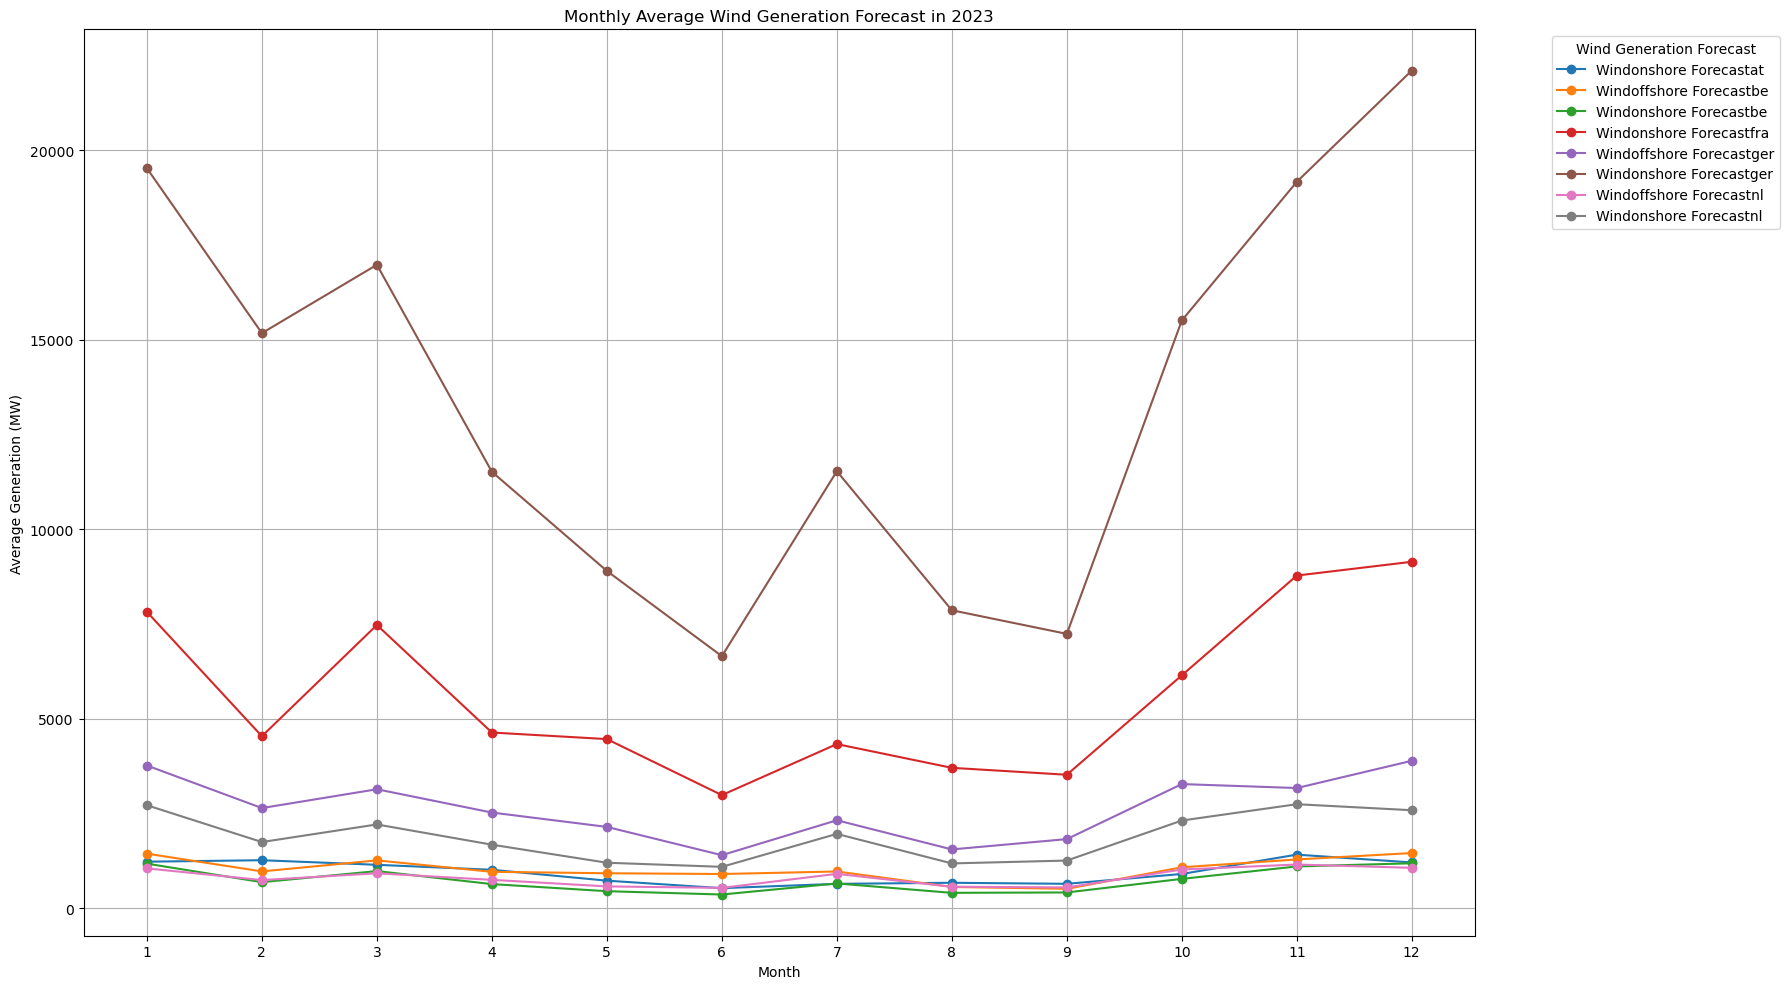

In [46]:
# Selecting a year for detailed analysis. For demonstration, we'll choose the most recent complete year available in the dataset.
selected_year = res_gen['year'].max()

# Filtering the dataset for the selected year
res_gen_selected_year = res_gen[res_gen['year'] == selected_year]

# Extracting the month from the date for monthly analysis
res_gen_selected_year['month'] = res_gen_selected_year['date'].dt.month

# Grouping data by month and calculating the average forecast for solar and wind generation
monthly_avg_res_gen = res_gen_selected_year.groupby('month').mean()

# Plotting the monthly average forecast for solar generation across countries in the selected year
plt.figure(figsize=(18, 10))
for column in monthly_avg_res_gen.columns:
    if 'solar' in column:
        plt.plot(monthly_avg_res_gen.index, monthly_avg_res_gen[column], marker='o', label=column.replace('_', ' ').title())

plt.title(f'Monthly Average Solar Generation Forecast in {selected_year}')
plt.xlabel('Month')
plt.ylabel('Average Generation (MW)')
plt.xticks(monthly_avg_res_gen.index)
plt.legend(title='Solar Generation Forecast', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

# Plotting the monthly average forecast for wind generation across countries in the selected year
plt.figure(figsize=(18, 10))
for column in monthly_avg_res_gen.columns:
    if 'wind' in column:
        plt.plot(monthly_avg_res_gen.index, monthly_avg_res_gen[column], marker='o', label=column.replace('_', ' ').title())

plt.title(f'Monthly Average Wind Generation Forecast in {selected_year}')
plt.xlabel('Month')
plt.ylabel('Average Generation (MW)')
plt.xticks(monthly_avg_res_gen.index)
plt.legend(title='Wind Generation Forecast', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()


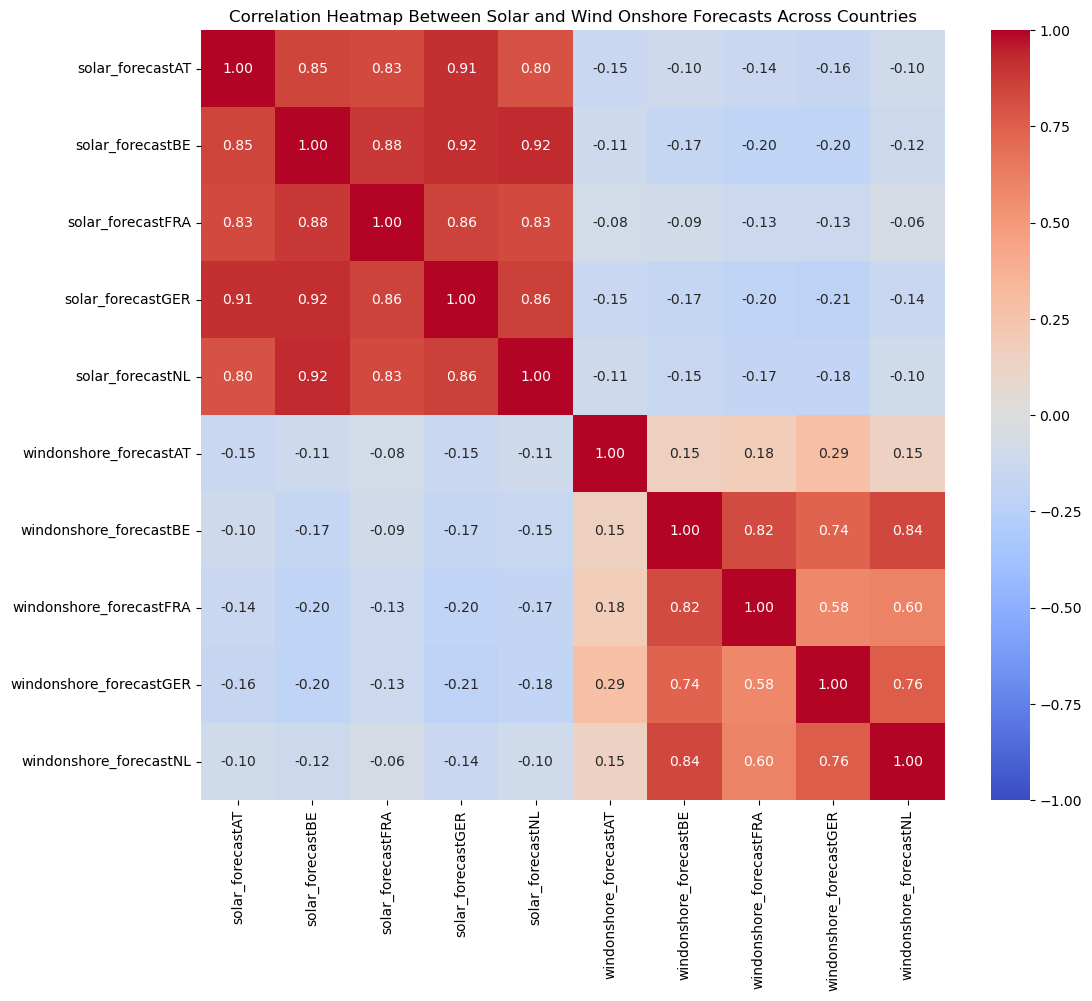

In [49]:
# Selecting columns for solar and wind onshore forecasts for all countries
solar_columns = [col for col in res_gen.columns if 'solar' in col]
wind_onshore_columns = [col for col in res_gen.columns if 'windonshore' in col]

# Combining the selected columns into a single list for analysis
combined_columns = solar_columns + wind_onshore_columns

# Creating a subset of the renewable generation forecast data focusing on solar and wind onshore forecasts
solar_wind_data = res_gen[combined_columns]

# Calculating the correlation matrix for the selected subset
solar_wind_correlation_matrix = solar_wind_data.corr()

# Plotting the correlation heatmap for solar and wind onshore forecasts
plt.figure(figsize=(12, 10))
sns.heatmap(solar_wind_correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title('Correlation Heatmap Between Solar and Wind Onshore Forecasts Across Countries')
plt.show()


## RESIDUAL_GENERATION

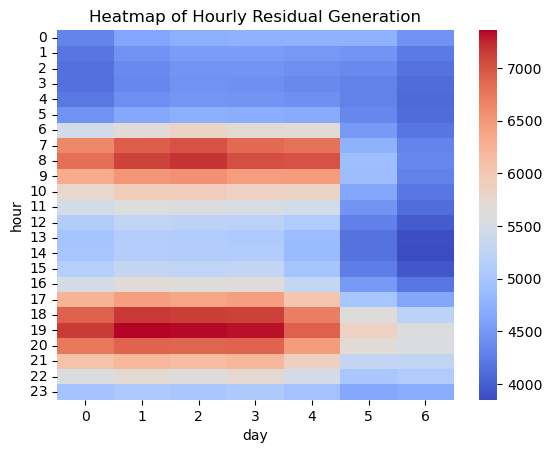

In [79]:
# Heatmap of Hourly Residual Generation

residual_gen['hour'] = residual_gen['date'].dt.hour
residual_gen['day'] = residual_gen['date'].dt.dayofweek
residual_gen['month'] = residual_gen['date'].dt.month
residual_gen['year'] = residual_gen['date'].dt.year

residual_gen_pivot = residual_gen.pivot_table(index='hour', columns='day', values='residual_generationAT', aggfunc='mean')
sns.heatmap(residual_gen_pivot, cmap='coolwarm')
plt.title('Heatmap of Hourly Residual GenerationAT')
plt.show()


C:\Users\volco\AppData\Local\Temp\ipykernel_10352\876806080.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_subset = residual_gen[(res_gen['date'] >= '2019-01-01') & (res_gen['date'] < '2023-12-31')]


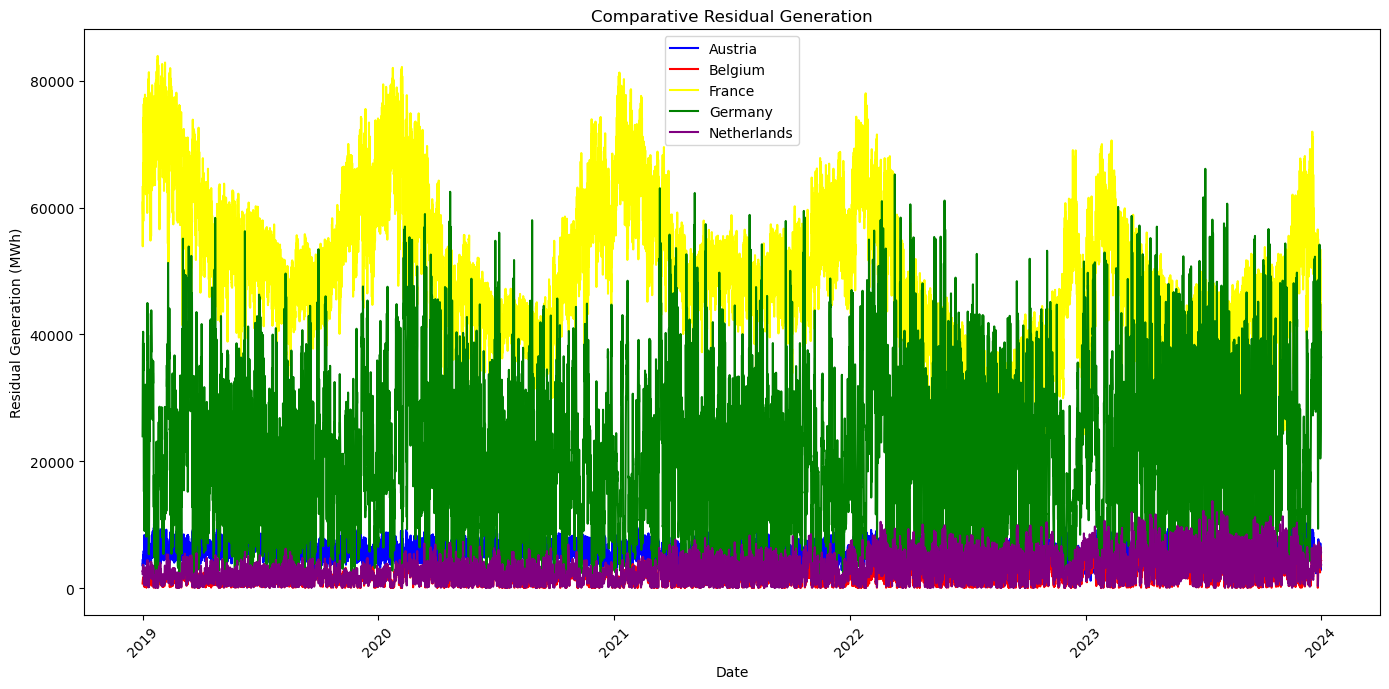

In [15]:
data_subset = residual_gen[(res_gen['date'] >= '2019-01-01') & (res_gen['date'] < '2023-12-31')]

# Comparative plot for residual generation among all countries (January 2019)
plt.figure(figsize=(14, 7))

# Plotting residual generation for each country
plt.plot(data_subset['date'], data_subset['residual_generationAT'], label='Austria', color='blue')
plt.plot(data_subset['date'], data_subset['residual_generationBE'], label='Belgium', color='red')
plt.plot(data_subset['date'], data_subset['residual_generationFRA'], label='France', color='yellow')
plt.plot(data_subset['date'], data_subset['residual_generationGER'], label='Germany', color='green')
plt.plot(data_subset['date'], data_subset['residual_generationNL'], label='Netherlands', color='purple')

plt.title('Comparative Residual Generation')
plt.ylabel('Residual Generation (MWh)')
plt.xlabel('Date')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


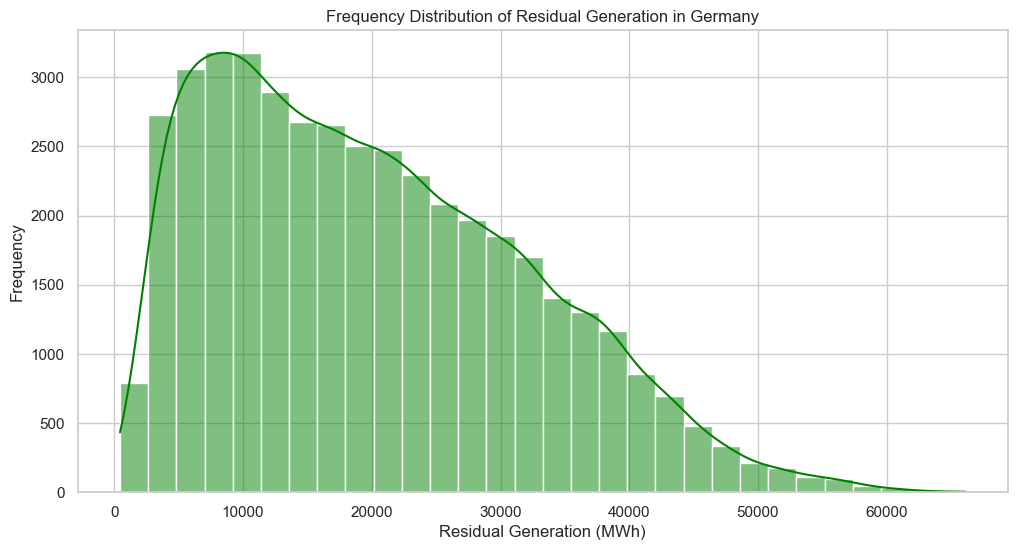

In [16]:
# Set plotting style
sns.set(style="whitegrid")

# Histograms for Frequency Distribution of Residual Generation in Germany
plt.figure(figsize=(12, 6))
sns.histplot(data_subset['residual_generationGER'], bins=30, kde=True, color='green')
plt.title('Frequency Distribution of Residual Generation in Germany')
plt.xlabel('Residual Generation (MWh)')
plt.ylabel('Frequency')
plt.show()



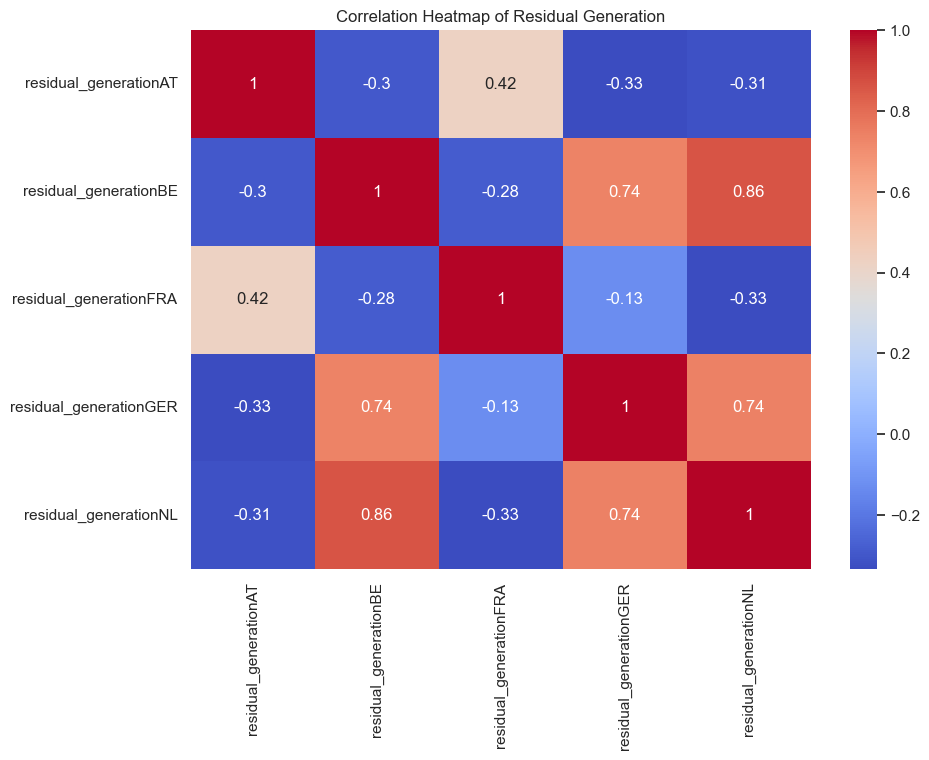

In [17]:
# Correlation Heatmap
plt.figure(figsize=(10, 7))
corr = data_subset[['residual_generationAT', 'residual_generationBE', 'residual_generationFRA', 'residual_generationGER', 'residual_generationNL']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Residual Generation')
plt.show()



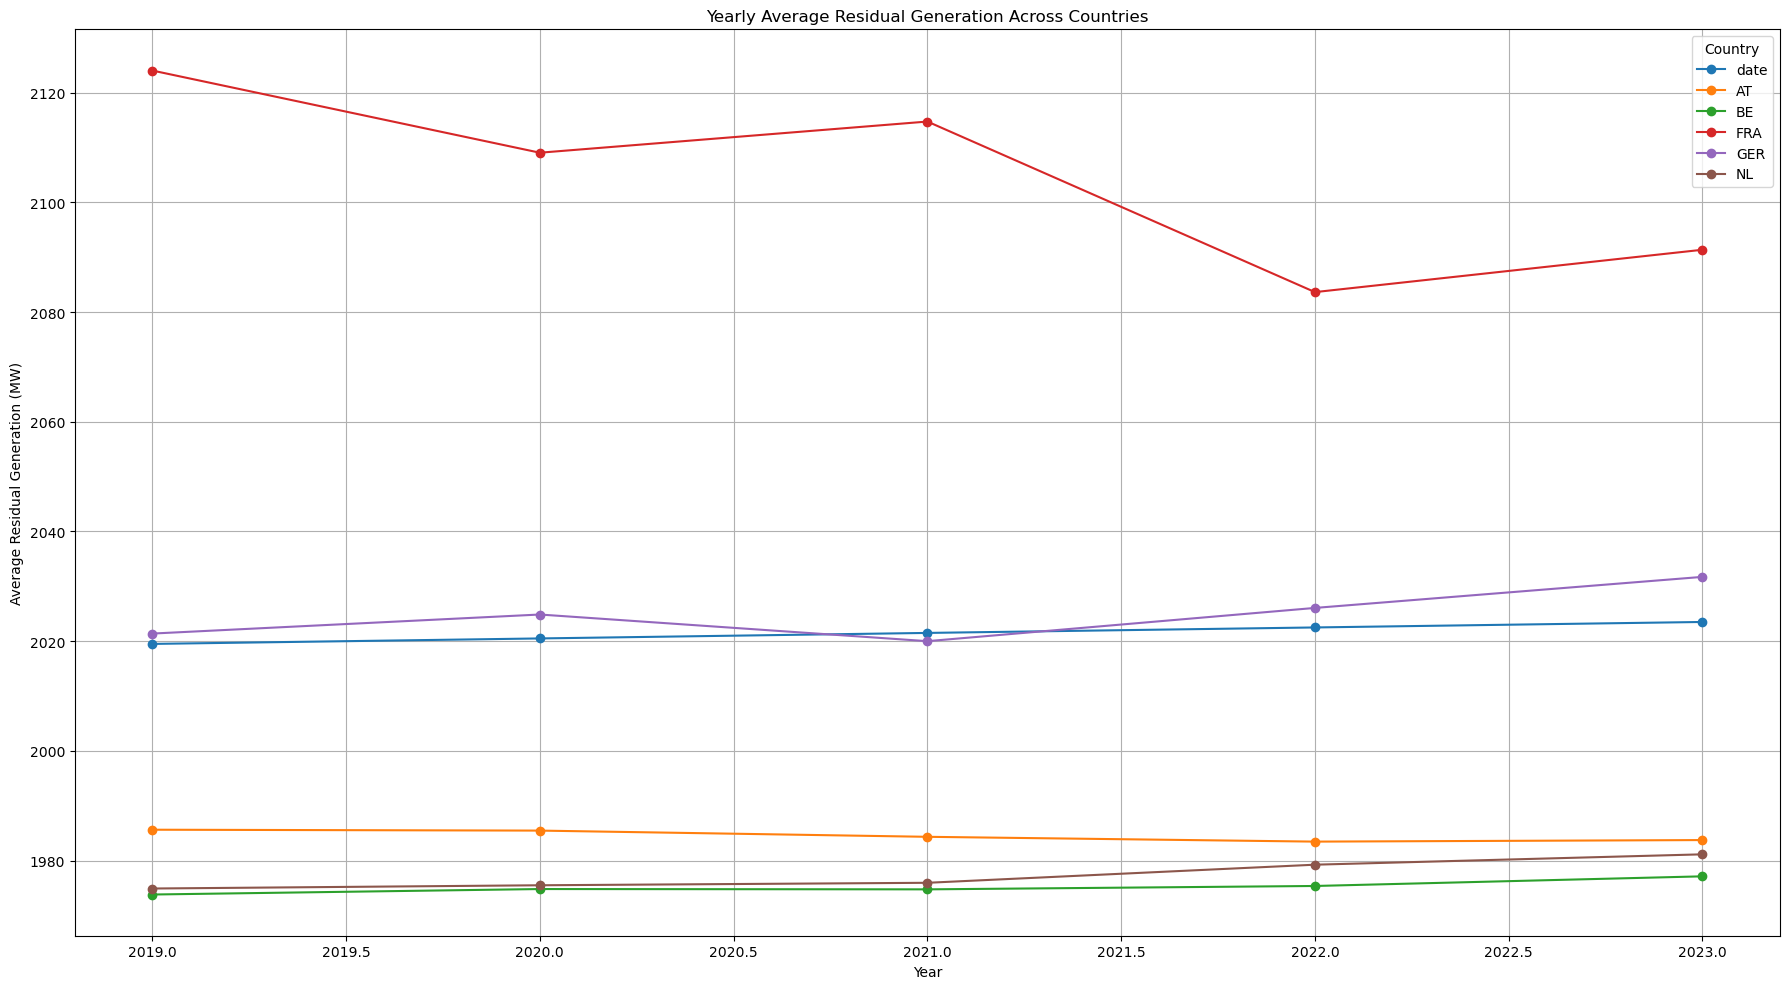

In [54]:
# Extracting the year and month from the date for grouping and further analysis
residual_gen['year'] = residual_gen['date'].dt.year
residual_gen['month'] = residual_gen['date'].dt.month

# Grouping data by year and calculating the average residual generation for each country
yearly_avg_residual_gen = residual_gen.groupby('year').mean()

# Plotting the yearly average residual generation across countries
plt.figure(figsize=(18, 10))
for column in yearly_avg_residual_gen.columns:
    if column not in ['month']:
        plt.plot(yearly_avg_residual_gen.index, yearly_avg_residual_gen[column], marker='o', label=column.replace('residual_generation', ''))

plt.title('Yearly Average Residual Generation Across Countries')
plt.xlabel('Year')
plt.ylabel('Average Residual Generation (MW)')
plt.legend(title='Country')
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()


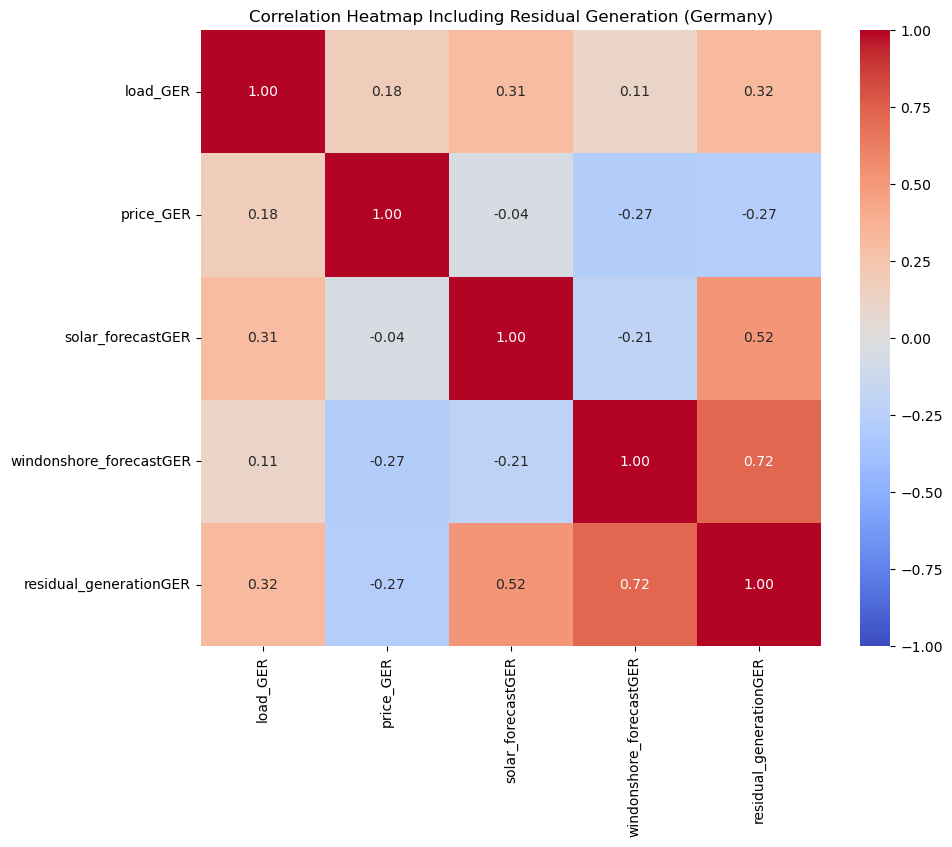

In [56]:
comprehensive_data = pd.merge(merged_data, residual_gen.drop(columns=['year', 'month']), on='date', how='inner')

# Selecting a subset of variables for correlation analysis
variables_of_interest = ['load_GER', 'price_GER', 'solar_forecastGER', 'windonshore_forecastGER', 'residual_generationGER']
subset_data = comprehensive_data[variables_of_interest]

# Calculating the correlation matrix for the selected subset
correlation_matrix_subset = subset_data.corr()

# Plotting the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_subset, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title('Correlation Heatmap Including Residual Generation (Germany)')
plt.show()